In [2]:
## import the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression # importing the model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, mean_squared_error
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve,roc_auc_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # SVC: support vector classifier
from sklearn import svm
import warnings
warnings.filterwarnings('always')
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import math
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline as impipeline
from sklearn.model_selection import train_test_split
import itertools
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.metrics import classification_report, roc_auc_score, roc_curve


# READING IN COLLECTED DATA

<span style="font-size:16px; font-family:Monospace;"> The dataset is a combination of NBA player per game metrics for the seasons between 2014 - 2021. This data contains the players' metrics over these seasons on a per-game basis.
It was read in, and concatenated to form a comprehensive dataset</span>

In [3]:
#reading in the datasets and concatenating them to form a comprehensive dataset
df2014 = pd.read_csv('NBA201415.txt')
df2015 = pd.read_csv('NBA201516.txt')
df2016 = pd.read_csv('NBA201617.txt')
df2017 = pd.read_csv('NBA201718.txt')
df2018 = pd.read_csv('NBA201819.txt')
df2019 = pd.read_csv('NBA201920.txt')
df2020 = pd.read_csv('NBA202021.txt')
df2021 = pd.read_csv('NBA202122.txt')

df = pd.concat([df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021])

In [4]:
df #viewing the dataset. It shows a total of 4198 rows and 32 columns

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,ALL_STAR
0,1,Quincy Acy,PF,24,NYK,68,22,18.9,2.2,4.9,...,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9,acyqu01,NaN
1,2,Jordan Adams,SG,20,MEM,30,0,8.3,1.2,2.9,...,0.6,0.9,0.5,0.5,0.2,0.5,0.8,3.1,adamsjo01,NaN
2,3,Steven Adams,C,21,OKC,70,67,25.3,3.1,5.7,...,4.6,7.5,0.9,0.5,1.2,1.4,3.2,7.7,adamsst01,NaN
3,4,Jeff Adrien,PF,28,MIN,17,0,12.6,1.1,2.6,...,3.2,4.5,0.9,0.2,0.5,0.5,1.8,3.5,adrieje01,NaN
4,5,Arron Afflalo,SG,29,TOT,78,72,32.1,4.8,11.3,...,2.8,3.2,1.7,0.5,0.1,1.5,2.1,13.3,afflaar01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,youngth01,NaN
601,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,youngtr01,1.0
602,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,yurtsom01,NaN
603,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,zelleco01,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4198 entries, 0 to 604
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 4198 non-null   int64  
 1   Player             4198 non-null   object 
 2   Pos                4198 non-null   object 
 3   Age                4198 non-null   int64  
 4   Tm                 4198 non-null   object 
 5   G                  4198 non-null   int64  
 6   GS                 4198 non-null   int64  
 7   MP                 4198 non-null   float64
 8   FG                 4198 non-null   float64
 9   FGA                4198 non-null   float64
 10  FG%                4175 non-null   float64
 11  3P                 4198 non-null   float64
 12  3PA                4198 non-null   float64
 13  3P%                3877 non-null   float64
 14  2P                 4198 non-null   float64
 15  2PA                4198 non-null   float64
 16  2P%                4142 n

# DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS

In [6]:
from pandas_profiling import ProfileReport

In [7]:
# pandasprof = ProfileReport(df)
# pandasprof.to_file('nbaproject.html') #using the pandas profiler library, 
#                         #this generates a html report which was used in analysis.

In [8]:
# Select rows from the DataFrame where the 'FT%' column has missing values
miss_ft= df[df['FT%'].isnull()]
#pd.set_option('display.max_rows', None)
miss_ft # Display the DataFrame containing rows with missing 'FT%' values

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,ALL_STAR
43,44,Jerrelle Benimon,PF,23,UTA,2,0,1.5,0.0,0.0,...,1.0,1.5,0.0,0.0,0.0,0.5,0.0,0.0,benimje01,NaN
46,47,Sim Bhullar,C,22,SAC,3,0,1.0,0.3,0.7,...,0.3,0.3,0.3,0.0,0.3,0.0,0.0,0.7,bhullsi01,NaN
77,78,Bruno Caboclo,SF,19,TOR,8,0,2.9,0.5,1.5,...,0.1,0.3,0.0,0.0,0.1,0.5,0.4,1.3,cabocbr01,NaN
91,92,Patrick Christopher,SG,26,UTA,4,1,7.3,0.8,3.0,...,1.0,1.5,0.0,0.3,0.0,0.3,1.5,1.5,chrispa01,NaN
95,96,Victor Claver,SF,26,POR,10,0,7.6,0.9,2.0,...,1.7,2.0,0.1,0.1,0.1,0.4,1.2,2.4,clavevi01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,530,Tyrell Terry,PG,21,MEM,2,0,1.5,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,terryty01,NaN
551,552,Denzel Valentine,SG,28,TOT,24,0,9.3,1.0,2.8,...,1.4,1.8,0.5,0.3,0.0,0.5,0.8,2.9,valende01,NaN
563,564,M.J. Walker,SG,23,PHO,2,0,4.0,0.0,2.0,...,0.5,0.5,0.5,1.0,0.0,0.0,0.5,0.0,walkemj01,NaN
571,572,Tremont Waters,PG,24,TOT,3,0,16.7,1.3,4.7,...,1.3,1.3,2.3,1.7,0.0,1.3,1.3,3.3,watertr01,NaN


In [9]:
# Select rows from the DataFrame where the 'eFG%' column has missing values
e_fg= df[df['eFG%'].isnull()]
#pd.set_option('display.max_rows', None)
e_fg

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,ALL_STAR
43,44,Jerrelle Benimon,PF,23,UTA,2,0,1.5,0.0,0.0,...,1.0,1.5,0.0,0.0,0.0,0.5,0.0,0.0,benimje01,NaN
446,447,Ronny Turiaf,C,32,MIN,2,0,9.5,0.0,0.0,...,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,turiaro01,NaN
111,112,Sam Dekker,PF,21,HOU,3,0,2.0,0.0,0.0,...,0.3,0.3,0.0,0.3,0.0,0.0,0.0,0.0,dekkesa01,NaN
204,205,Danuel House Jr.,SG,23,WAS,1,0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,houseda01,NaN
306,307,Tyler Lydon,PF,21,DEN,1,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lydonty01,NaN
328,329,Trey McKinney-Jones,SG,27,IND,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mckintr01,NaN
347,348,Ben Moore,PF,22,IND,2,0,4.5,0.0,0.0,...,0.5,0.5,0.5,0.0,0.0,0.0,2.0,0.0,moorebe01,NaN
232,233,John Holland,SF,30,CLE,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hollajo02,NaN
281,282,George King,SF,25,PHO,1,0,6.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,kingge03,NaN
450,451,Kobi Simmons,PG,21,CLE,1,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,simmoko01,NaN


In [10]:
# Select rows from the DataFrame where the '2P%' column has missing values
twoPt = df[df['2P%'].isnull()]
#pd.set_option('display.max_rows', None)
twoPt

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,ALL_STAR
43,44,Jerrelle Benimon,PF,23,UTA,2,0,1.5,0.0,0.0,...,1.0,1.5,0.0,0.0,0.0,0.5,0.0,0.0,benimje01,NaN
119,120,Andre Dawkins,SG,23,MIA,4,0,5.5,0.3,1.5,...,0.5,0.5,0.3,0.0,0.0,0.3,0.8,0.8,dawkian01,NaN
156,157,Jamaal Franklin,SG,23,DEN,3,0,4.3,0.3,0.7,...,0.3,0.7,1.0,0.0,0.3,1.0,1.3,1.0,frankja01,NaN
446,447,Ronny Turiaf,C,32,MIN,2,0,9.5,0.0,0.0,...,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,turiaro01,NaN
111,112,Sam Dekker,PF,21,HOU,3,0,2.0,0.0,0.0,...,0.3,0.3,0.0,0.3,0.0,0.0,0.0,0.0,dekkesa01,NaN
183,184,Joe Harris,SG,24,CLE,5,0,3.0,0.2,0.8,...,0.6,0.6,0.4,0.0,0.0,0.2,0.2,0.6,harrijo01,NaN
375,376,Nate Robinson,PG,31,NOP,2,1,11.5,0.0,0.5,...,0.0,0.0,2.0,0.5,0.0,0.0,2.5,0.0,robinna01,NaN
204,205,Danuel House Jr.,SG,23,WAS,1,0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,houseda01,NaN
209,210,R.J. Hunter,SG,23,CHI,3,0,3.0,0.0,0.3,...,0.3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,hunterj01,NaN
59,60,Chris Boucher,PF,25,GSW,1,0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bouchch01,NaN


In [11]:
# Select rows from the DataFrame where the '3P%' column has missing values

threep = df[df['3P%'].isnull()]
#pd.set_option('display.max_rows', None)
threep

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,ALL_STAR
3,4,Jeff Adrien,PF,28,MIN,17,0,12.6,1.1,2.6,...,3.2,4.5,0.9,0.2,0.5,0.5,1.8,3.5,adrieje01,NaN
5,6,Alexis Ajinça,C,26,NOP,68,8,14.1,2.7,4.8,...,3.1,4.6,0.7,0.3,0.8,1.0,2.2,6.5,ajincal01,NaN
7,8,Cole Aldrich,C,26,NYK,61,16,16.0,2.4,4.9,...,3.9,5.5,1.2,0.6,1.1,1.0,2.0,5.5,aldrico01,NaN
9,10,Lavoy Allen,C,25,IND,63,0,17.0,2.2,4.7,...,3.2,5.1,1.2,0.2,0.7,0.6,1.6,5.0,allenla01,NaN
19,20,Joel Anthony,C,32,DET,49,0,8.3,0.7,1.3,...,1.2,1.9,0.1,0.2,1.0,0.2,1.1,1.8,anthojo01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,529,Emanuel Terry,PF,25,PHO,3,0,6.0,0.0,1.7,...,2.3,5.0,0.7,0.3,0.0,1.7,1.3,0.0,terryem01,NaN
529,530,Tyrell Terry,PG,21,MEM,2,0,1.5,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,terryty01,NaN
530,531,Jon Teske,C,24,MEM,3,0,2.7,0.0,0.3,...,0.7,0.7,0.3,0.3,0.0,0.0,0.3,0.0,teskejo01,NaN
578,579,Hassan Whiteside,C,32,UTA,65,8,17.9,3.3,5.1,...,5.0,7.6,0.4,0.3,1.6,0.8,2.8,8.2,whiteha01,NaN


In [12]:
# Fill missing values in the DataFrame 'df' with zeros and store the result in 'df2'
df2 = df.fillna(0)

In [13]:
df2 #displaying DataFrame df2

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,ALL_STAR
0,1,Quincy Acy,PF,24,NYK,68,22,18.9,2.2,4.9,...,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9,acyqu01,0.0
1,2,Jordan Adams,SG,20,MEM,30,0,8.3,1.2,2.9,...,0.6,0.9,0.5,0.5,0.2,0.5,0.8,3.1,adamsjo01,0.0
2,3,Steven Adams,C,21,OKC,70,67,25.3,3.1,5.7,...,4.6,7.5,0.9,0.5,1.2,1.4,3.2,7.7,adamsst01,0.0
3,4,Jeff Adrien,PF,28,MIN,17,0,12.6,1.1,2.6,...,3.2,4.5,0.9,0.2,0.5,0.5,1.8,3.5,adrieje01,0.0
4,5,Arron Afflalo,SG,29,TOT,78,72,32.1,4.8,11.3,...,2.8,3.2,1.7,0.5,0.1,1.5,2.1,13.3,afflaar01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,youngth01,0.0
601,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,youngtr01,1.0
602,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,yurtsom01,0.0
603,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,zelleco01,0.0


In [14]:
#checking the DataFrame for null values
rows_having_nan_values = df2[df2.isnull().any(axis=1)]
print(rows_having_nan_values)

Empty DataFrame
Columns: [Rk, Player, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Player-additional, ALL_STAR]
Index: []

[0 rows x 32 columns]


In [15]:
df2['ALL_STAR'].value_counts() #counting the target variable

0.0    3981
1.0     217
Name: ALL_STAR, dtype: int64

In [16]:
# Calculate descriptive statistics for the DataFrame 'df2' and transpose the result
# This will provide summary statistics for each column in a more readable format
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rk,4198.0,264.292520,154.010682,1.0,132.000,263.000,394.000,605.0
Age,4198.0,26.027394,4.214576,19.0,23.000,25.000,29.000,43.0
G,4198.0,48.091949,25.066642,1.0,27.000,54.000,69.000,83.0
GS,4198.0,22.675083,26.952083,0.0,1.000,8.500,43.000,82.0
MP,4198.0,19.601715,9.286438,0.7,12.300,19.200,27.400,43.5
FG,4198.0,3.128633,2.195392,0.0,1.500,2.600,4.300,11.4
FGA,4198.0,6.927108,4.614652,0.0,3.500,5.800,9.500,24.5
FG%,4198.0,0.439827,0.112232,0.0,0.400,0.439,0.489,1.0
3P,4198.0,0.837351,0.810349,0.0,0.100,0.600,1.300,5.3
3PA,4198.0,2.399690,2.101884,0.0,0.700,2.000,3.600,13.2


# IDENTIFYING OUTLIERS

In [17]:
# Set the threshold for minimum number of games
min_games_threshold = 48 #48 is chosen here as the average number of games played

# Filter the dataset to include players below the minimum games threshold and who made the All-Star team
filtered_data = df2[(df2['GS'] < min_games_threshold) & (df2['ALL_STAR'] == 1.0)]

# Display the filtered dataset
filtered_data


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,ALL_STAR
18,19,Carmelo Anthony,SF,30,NYK,40,40,35.7,9.0,20.2,...,4.8,6.6,3.1,1.0,0.4,2.2,2.2,24.2,anthoca01,1.0
58,59,Chris Bosh,C,30,MIA,44,44,35.4,7.8,16.9,...,6.0,7.0,2.2,0.9,0.6,2.2,1.6,21.1,boshch01,1.0
67,68,Kobe Bryant,SG,36,LAL,35,35,34.5,7.6,20.4,...,4.9,5.7,5.6,1.3,0.2,3.7,1.9,22.3,bryanko01,1.0
138,139,Kevin Durant,SF,26,OKC,27,27,33.8,8.8,17.3,...,6.0,6.6,4.1,0.9,0.9,2.7,1.5,25.4,duranke01,1.0
170,171,Paul George,SF,24,IND,6,0,15.2,3.0,8.2,...,3.0,3.7,1.0,0.8,0.2,2.0,1.8,8.8,georgpa01,1.0
498,499,John Wall,PG,27,WAS,41,41,34.4,6.8,16.3,...,3.1,3.7,9.6,1.4,1.1,3.9,2.0,19.4,walljo01,1.0
377,378,Dirk Nowitzki,PF,40,DAL,51,20,15.6,2.6,7.4,...,3.0,3.1,0.7,0.2,0.4,0.4,1.5,7.3,nowitdi01,1.0
388,389,Victor Oladipo,SG,26,IND,36,36,31.9,6.9,16.3,...,5.0,5.6,5.2,1.7,0.3,2.3,2.0,18.8,oladivi01,1.0
493,494,Dwyane Wade,SG,37,MIA,72,2,26.2,5.8,13.3,...,3.0,4.0,4.2,0.8,0.5,2.3,1.6,15.0,wadedw01,1.0
498,499,John Wall,PG,28,WAS,32,32,34.5,7.7,17.3,...,3.2,3.6,8.7,1.5,0.9,3.8,2.2,20.7,walljo01,1.0


<span style="font-size:16px; font-family:Monospace;">Paul George was injured whilst on international duty. https://cbssports.com/nba/news/pacers-paul-george-suffers-serious-leg-injury-in-scrimmage/. He was selected but missed the game due to injury: https://si.com/nba/clippers/news/paul-george-grateful-to-be-in-all-star-game. Wade and Dirk were added honourarily: https://bleacherreport.com/articles/2818776-dwyane-wade-dirk-nowitzki-named-special-additions-to-2019-nba-all-star-game.</span>

In [18]:
# Given an average number of games played
average_games_played = 48
low_num_games = df2[(df2['G'] < average_games_played) & (df2['ALL_STAR'] == 1.0)] # Select rows from the DataFrame 'df2' where the number of games played ('G') is less than the average,and the player was selected as an ALL-STAR (indicated by 'ALL_STAR' being 1.0)

low_num_games # Display the subset of the DataFrame containing players with a low number of games played and selected as ALL-STARS

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,ALL_STAR
18,19,Carmelo Anthony,SF,30,NYK,40,40,35.7,9.0,20.2,...,4.8,6.6,3.1,1.0,0.4,2.2,2.2,24.2,anthoca01,1.0
58,59,Chris Bosh,C,30,MIA,44,44,35.4,7.8,16.9,...,6.0,7.0,2.2,0.9,0.6,2.2,1.6,21.1,boshch01,1.0
67,68,Kobe Bryant,SG,36,LAL,35,35,34.5,7.6,20.4,...,4.9,5.7,5.6,1.3,0.2,3.7,1.9,22.3,bryanko01,1.0
138,139,Kevin Durant,SF,26,OKC,27,27,33.8,8.8,17.3,...,6.0,6.6,4.1,0.9,0.9,2.7,1.5,25.4,duranke01,1.0
170,171,Paul George,SF,24,IND,6,0,15.2,3.0,8.2,...,3.0,3.7,1.0,0.8,0.2,2.0,1.8,8.8,georgpa01,1.0
498,499,John Wall,PG,27,WAS,41,41,34.4,6.8,16.3,...,3.1,3.7,9.6,1.4,1.1,3.9,2.0,19.4,walljo01,1.0
388,389,Victor Oladipo,SG,26,IND,36,36,31.9,6.9,16.3,...,5.0,5.6,5.2,1.7,0.3,2.3,2.0,18.8,oladivi01,1.0
498,499,John Wall,PG,28,WAS,32,32,34.5,7.7,17.3,...,3.2,3.6,8.7,1.5,0.9,3.8,2.2,20.7,walljo01,1.0
117,118,Anthony Davis,PF,27,LAL,36,36,32.3,8.4,17.0,...,6.2,7.9,3.1,1.3,1.6,2.1,1.7,21.8,davisan02,1.0
139,140,Kevin Durant,PF,32,BRK,35,32,33.1,9.3,17.2,...,6.7,7.1,5.6,0.7,1.3,3.4,2.0,26.9,duranke01,1.0


<span style="font-size:16px; font-family:Monospace;">According to the data available on https://nba.com/news/history-nba-all-star-game, these players were originally selected and then some were replaced upon injury. Some of the players in the list are replacements for originally selected players. e.g Draymond Green.</span>

In [19]:
df2[(df2['Age'] > 35)&(df2['ALL_STAR']==1.0)]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,ALL_STAR
67,68,Kobe Bryant,SG,36,LAL,35,35,34.5,7.6,20.4,...,4.9,5.7,5.6,1.3,0.2,3.7,1.9,22.3,bryanko01,1.0
136,137,Tim Duncan,C,38,SAS,77,77,28.9,5.4,10.6,...,6.9,9.1,3.0,0.8,2.0,1.7,2.1,13.9,duncati01,1.0
346,347,Dirk Nowitzki,PF,36,DAL,77,77,29.6,6.3,13.8,...,5.4,5.9,1.9,0.5,0.4,1.1,2.1,17.3,nowitdi01,1.0
65,66,Kobe Bryant,SF,37,LAL,66,66,28.2,6.0,16.9,...,3.1,3.7,2.8,0.9,0.2,2.0,1.7,17.6,bryanko01,1.0
123,124,Tim Duncan,C,39,SAS,61,60,25.2,3.5,7.2,...,5.4,7.3,2.7,0.8,1.3,1.5,2.0,8.6,duncati01,1.0
377,378,Dirk Nowitzki,PF,40,DAL,51,20,15.6,2.6,7.4,...,3.0,3.1,0.7,0.2,0.4,0.4,1.5,7.3,nowitdi01,1.0
493,494,Dwyane Wade,SG,37,MIA,72,2,26.2,5.8,13.3,...,3.0,4.0,4.2,0.8,0.5,2.3,1.6,15.0,wadedw01,1.0
251,252,LeBron James,PG,36,LAL,45,45,33.4,9.4,18.3,...,7.0,7.7,7.8,1.1,0.6,3.7,1.6,25.0,jamesle01,1.0
273,274,LeBron James,PF,37,LAL,56,56,37.2,11.4,21.8,...,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3,jamesle01,1.0
437,438,Chris Paul,PG,36,PHO,65,65,32.9,5.6,11.3,...,4.0,4.4,10.8,1.9,0.3,2.4,2.1,14.7,paulch01,1.0


<span style="font-size:16px; font-family:Monospace;">in 2015, Tim Duncan was selected by the NBA head coaches to participate in his final ASG at 39yrs old. https://nba.com/spurs/tim-duncan-selected-play-2015-nba-all-star-game Kobe was voted by fans on sentiment. https://bleacherreport.com/articles/2337092-making-the-case-for-tim-duncan-on-the-2015-nba-all-star-team.</span>

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='ALL_STAR', ylabel='Age'>

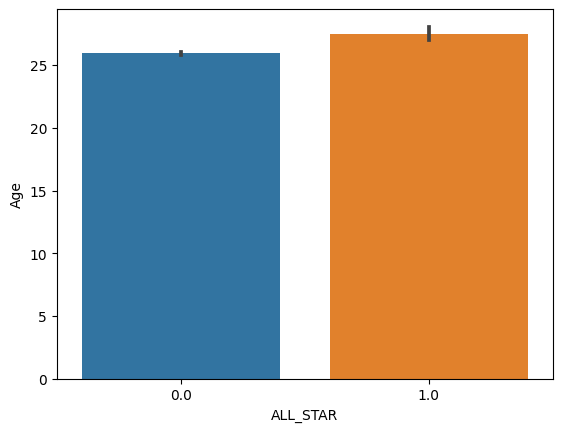

In [20]:
#sns.scatterplot(data=df2, x='Age', y='ALL_STAR')
sns.barplot(data=df2, x="ALL_STAR", y="Age")

Text(0.5, 1.0, 'Chart of Minutes played per game by All-Star Status')

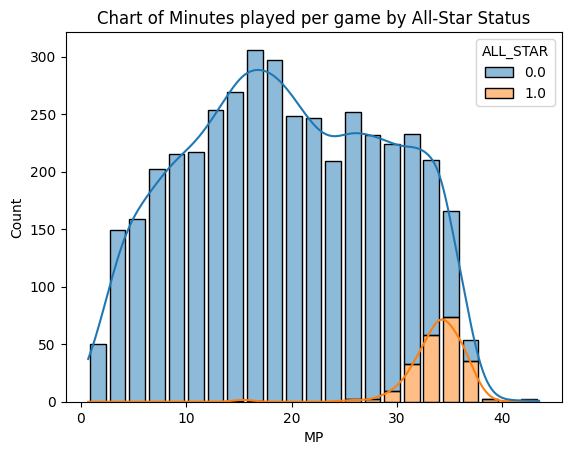

In [21]:
#creating a histogram plot of minutes played per game ('MP') with different colors for ALL-STAR status
sns.histplot(data=df2, x="MP", hue="ALL_STAR", multiple="stack", shrink=.8, kde=True)
plt.title('Chart of Minutes played per game by All-Star Status') #adding a title to the chart

<span style="font-size:16px; font-family:Monospace;">From the chart above, it's evident that All-Star players play more minutes than None All-Star players. An NBA game last for 48 minutes, with each quarter lasting for 12 minutes.As a coach, you'll give your best players more game time.</span>

Text(0.5, 1.0, 'Chart of Games played per game by All-Star Status')

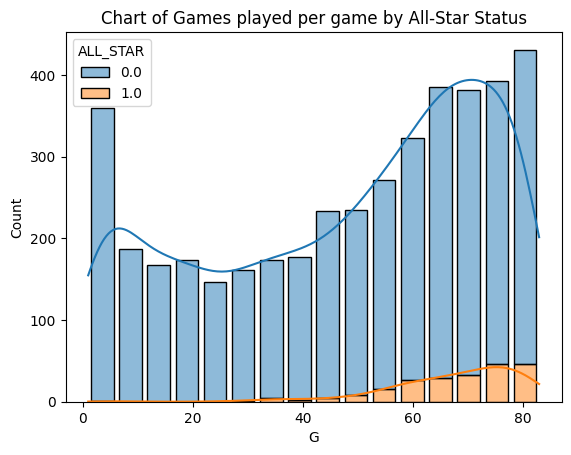

In [22]:
#creating a histogram plot of games played by all-star status
sns.histplot(data=df2, x="G", hue="ALL_STAR", multiple="stack", shrink=.8, kde=True)
plt.title('Chart of Games played by All-Star Status')

Text(0.5, 1.0, 'Fig 3a. Boxplot of Points Per Game by All-Star Status')

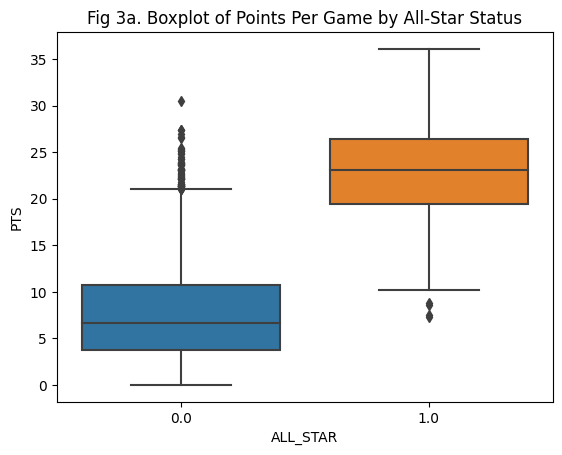

In [23]:
#plotting a boxplot of PPG against all-star status
sns.boxplot(data=df2, x="ALL_STAR", y="PTS")
plt.title('Fig 3a. Boxplot of Points Per Game by All-Star Status')

Text(0.5, 1.0, 'Fig 3b. Boxplot of Field Goal Average by All-Star Status')

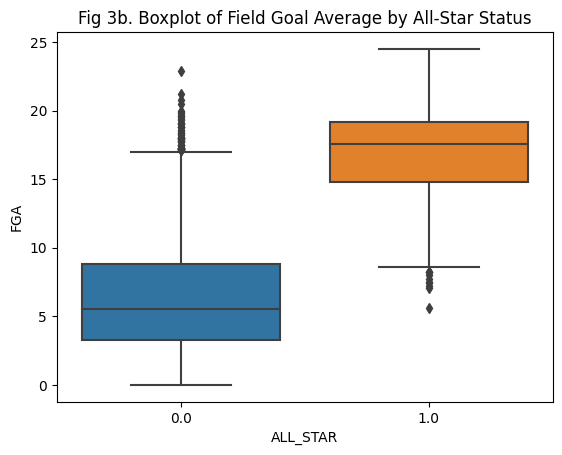

In [24]:
sns.boxplot(data=df2, x="ALL_STAR", y="FGA")
plt.title('Fig 3b. Boxplot of Field Goal Average by All-Star Status')

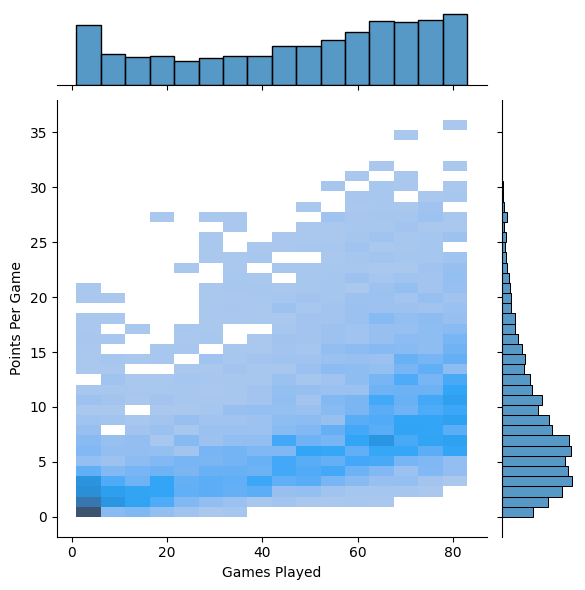

In [24]:
sns.jointplot(x='G', y='PTS',data=df2, kind="hist")

# Add labels and title
plt.xlabel('Games Played')
plt.ylabel('Points Per Game')
#plt.title('Games Played vs Points per Game')

# Display the plot
plt.show()


<Figure size 1280x960 with 0 Axes>

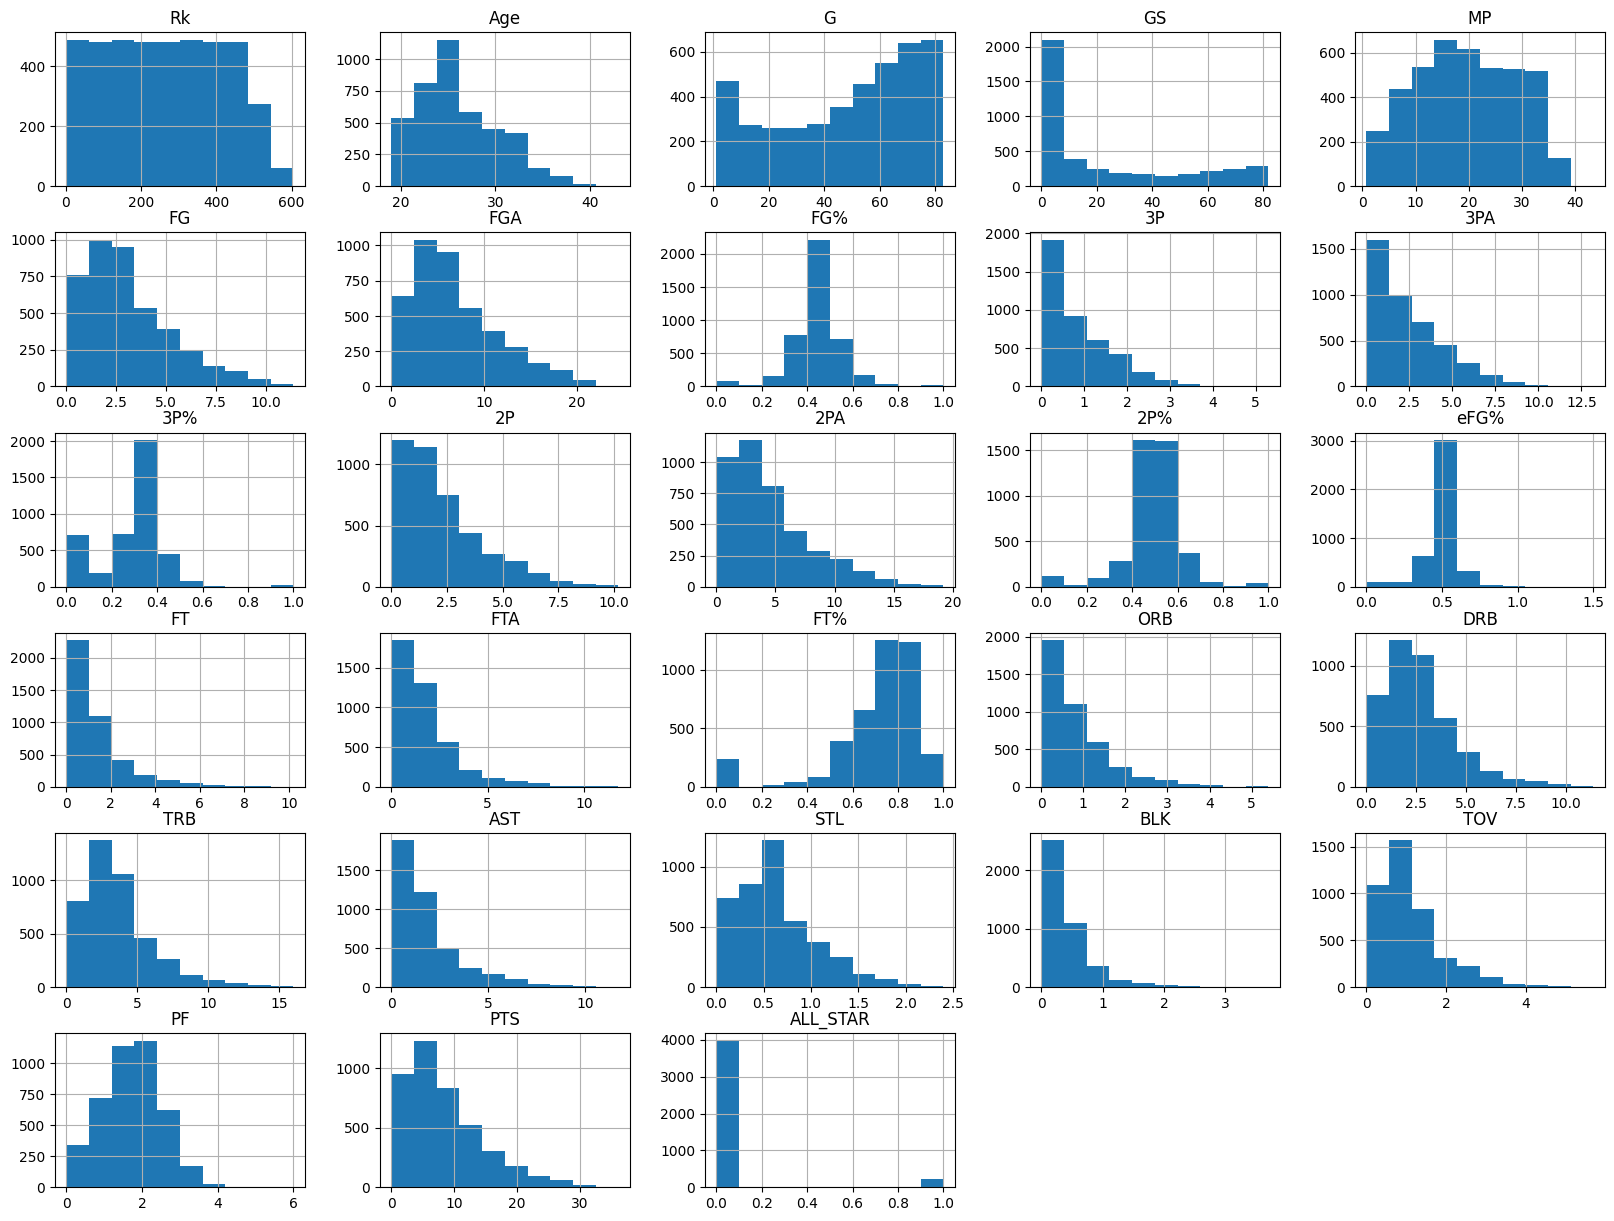

In [25]:
plt.figure(dpi=200)
df2.hist(figsize = (20,15))
plt.show()

# FEATURE ENGINEERING

In [26]:
# Convert the 'ALL_STAR' column values in DataFrame 'df2' to integer type
df2["ALL_STAR"]=df2["ALL_STAR"].values.astype('int64')

In [27]:
df2

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,ALL_STAR
0,1,Quincy Acy,PF,24,NYK,68,22,18.9,2.2,4.9,...,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9,acyqu01,0
1,2,Jordan Adams,SG,20,MEM,30,0,8.3,1.2,2.9,...,0.6,0.9,0.5,0.5,0.2,0.5,0.8,3.1,adamsjo01,0
2,3,Steven Adams,C,21,OKC,70,67,25.3,3.1,5.7,...,4.6,7.5,0.9,0.5,1.2,1.4,3.2,7.7,adamsst01,0
3,4,Jeff Adrien,PF,28,MIN,17,0,12.6,1.1,2.6,...,3.2,4.5,0.9,0.2,0.5,0.5,1.8,3.5,adrieje01,0
4,5,Arron Afflalo,SG,29,TOT,78,72,32.1,4.8,11.3,...,2.8,3.2,1.7,0.5,0.1,1.5,2.1,13.3,afflaar01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,youngth01,0
601,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,youngtr01,1
602,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,yurtsom01,0
603,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,zelleco01,0


In [28]:
# Drop the irrelevant columns like player name, position, team etc.
df3 = df2.drop(["Rk", "Player", "Tm", "Player-additional"], axis=1)

# Print the updated dataframe
df3

,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ALL_STAR
0,PF,24,68,22,18.9,2.2,4.9,0.459,0.3,0.9,...,1.2,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9,0
1,SG,20,30,0,8.3,1.2,2.9,0.407,0.3,0.8,...,0.3,0.6,0.9,0.5,0.5,0.2,0.5,0.8,3.1,0
2,C,21,70,67,25.3,3.1,5.7,0.544,0.0,0.0,...,2.8,4.6,7.5,0.9,0.5,1.2,1.4,3.2,7.7,0
3,PF,28,17,0,12.6,1.1,2.6,0.432,0.0,0.0,...,1.4,3.2,4.5,0.9,0.2,0.5,0.5,1.8,3.5,0
4,SG,29,78,72,32.1,4.8,11.3,0.424,1.5,4.3,...,0.3,2.8,3.2,1.7,0.5,0.1,1.5,2.1,13.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,PF,33,52,1,16.3,2.7,5.2,0.518,0.3,0.9,...,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,0
601,PG,23,76,76,34.9,9.4,20.3,0.460,3.1,8.0,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,1
602,C,23,56,12,12.6,2.3,4.4,0.526,0.0,0.2,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,0
603,C,29,27,0,13.1,1.9,3.3,0.567,0.0,0.1,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,0


In [29]:
#reseting the index
df3 = df3.reset_index(drop=True)
df3

,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ALL_STAR
0,PF,24,68,22,18.9,2.2,4.9,0.459,0.3,0.9,...,1.2,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9,0
1,SG,20,30,0,8.3,1.2,2.9,0.407,0.3,0.8,...,0.3,0.6,0.9,0.5,0.5,0.2,0.5,0.8,3.1,0
2,C,21,70,67,25.3,3.1,5.7,0.544,0.0,0.0,...,2.8,4.6,7.5,0.9,0.5,1.2,1.4,3.2,7.7,0
3,PF,28,17,0,12.6,1.1,2.6,0.432,0.0,0.0,...,1.4,3.2,4.5,0.9,0.2,0.5,0.5,1.8,3.5,0
4,SG,29,78,72,32.1,4.8,11.3,0.424,1.5,4.3,...,0.3,2.8,3.2,1.7,0.5,0.1,1.5,2.1,13.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,PF,33,52,1,16.3,2.7,5.2,0.518,0.3,0.9,...,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,0
4194,PG,23,76,76,34.9,9.4,20.3,0.460,3.1,8.0,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,1
4195,C,23,56,12,12.6,2.3,4.4,0.526,0.0,0.2,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,0
4196,C,29,27,0,13.1,1.9,3.3,0.567,0.0,0.1,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,0


In [30]:
my_object_df = df3.select_dtypes(include = 'object') # obtains all the datatypes that are objects
my_object_df

,Pos
0,PF
1,SG
2,C
3,PF
4,SG
...,...
4193,PF
4194,PG
4195,C
4196,C


In [31]:
my_df_numeric = df3.select_dtypes(exclude ='object') # obtains the numerical data type
my_df_numeric

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ALL_STAR
0,24,68,22,18.9,2.2,4.9,0.459,0.3,0.9,0.300,...,1.2,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9,0
1,20,30,0,8.3,1.2,2.9,0.407,0.3,0.8,0.400,...,0.3,0.6,0.9,0.5,0.5,0.2,0.5,0.8,3.1,0
2,21,70,67,25.3,3.1,5.7,0.544,0.0,0.0,0.000,...,2.8,4.6,7.5,0.9,0.5,1.2,1.4,3.2,7.7,0
3,28,17,0,12.6,1.1,2.6,0.432,0.0,0.0,0.000,...,1.4,3.2,4.5,0.9,0.2,0.5,0.5,1.8,3.5,0
4,29,78,72,32.1,4.8,11.3,0.424,1.5,4.3,0.354,...,0.3,2.8,3.2,1.7,0.5,0.1,1.5,2.1,13.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,33,52,1,16.3,2.7,5.2,0.518,0.3,0.9,0.354,...,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,0
4194,23,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,1
4195,23,56,12,12.6,2.3,4.4,0.526,0.0,0.2,0.091,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,0
4196,29,27,0,13.1,1.9,3.3,0.567,0.0,0.1,0.000,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,0


### Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
#label encoding the Position column, as it's a categorical data
le = LabelEncoder()
df3['Pos'] = le.fit_transform(df3['Pos'])

In [33]:
df3

,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ALL_STAR
0,2,24,68,22,18.9,2.2,4.9,0.459,0.3,0.9,...,1.2,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9,0
1,11,20,30,0,8.3,1.2,2.9,0.407,0.3,0.8,...,0.3,0.6,0.9,0.5,0.5,0.2,0.5,0.8,3.1,0
2,0,21,70,67,25.3,3.1,5.7,0.544,0.0,0.0,...,2.8,4.6,7.5,0.9,0.5,1.2,1.4,3.2,7.7,0
3,2,28,17,0,12.6,1.1,2.6,0.432,0.0,0.0,...,1.4,3.2,4.5,0.9,0.2,0.5,0.5,1.8,3.5,0
4,11,29,78,72,32.1,4.8,11.3,0.424,1.5,4.3,...,0.3,2.8,3.2,1.7,0.5,0.1,1.5,2.1,13.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,2,33,52,1,16.3,2.7,5.2,0.518,0.3,0.9,...,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,0
4194,5,23,76,76,34.9,9.4,20.3,0.460,3.1,8.0,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,1
4195,0,23,56,12,12.6,2.3,4.4,0.526,0.0,0.2,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,0
4196,0,29,27,0,13.1,1.9,3.3,0.567,0.0,0.1,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,0


### Pearsons Coefficient

In [34]:
correlation = df3.corr() # Calculating the correlation matrix for DataFrame 'df3'
correlation

,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ALL_STAR
Pos,1.000000,-0.063898,-0.029968,-0.039557,0.067659,0.001677,0.099326,-0.328049,0.346771,0.370496,...,-0.512415,-0.322417,-0.401415,0.108106,0.136507,-0.421053,0.001860,-0.198080,0.041223,-0.029528
Age,-0.063898,1.000000,0.122984,0.076251,0.124766,0.069263,0.070706,0.047157,0.127607,0.110145,...,-0.007051,0.093252,0.067265,0.132250,0.061583,-0.000352,0.057652,0.071667,0.078084,0.082225
G,-0.029968,0.122984,1.000000,0.616671,0.658203,0.540663,0.519890,0.292578,0.383304,0.362227,...,0.325594,0.502482,0.477655,0.373485,0.463897,0.306249,0.434648,0.523837,0.529851,0.182398
GS,-0.039557,0.076251,0.616671,1.000000,0.797952,0.741374,0.721001,0.211992,0.460019,0.449763,...,0.417318,0.664546,0.627516,0.541984,0.596979,0.405435,0.639583,0.583771,0.731051,0.384847
MP,0.067659,0.124766,0.658203,0.797952,1.000000,0.882785,0.892311,0.232440,0.641721,0.649533,...,0.395558,0.728106,0.668068,0.685028,0.746457,0.400650,0.772178,0.734546,0.879659,0.357026
FG,0.001677,0.069263,0.540663,0.741374,0.882785,1.000000,0.976226,0.297674,0.615491,0.614968,...,0.405782,0.725154,0.669060,0.682905,0.647149,0.404382,0.821741,0.619844,0.989289,0.517083
FGA,0.099326,0.070706,0.519890,0.721001,0.892311,0.976226,1.000000,0.156971,0.699823,0.718037,...,0.285052,0.656045,0.579604,0.720500,0.669836,0.307217,0.834599,0.588482,0.981172,0.495320
FG%,-0.328049,0.047157,0.292578,0.211992,0.232440,0.297674,0.156971,1.000000,-0.047491,-0.111986,...,0.458860,0.359242,0.412327,0.057576,0.114994,0.397463,0.153189,0.331029,0.251314,0.086649
3P,0.346771,0.127607,0.383304,0.460019,0.641721,0.615491,0.699823,-0.047491,1.000000,0.980207,...,-0.173938,0.259917,0.139857,0.503487,0.474065,-0.036106,0.484659,0.303758,0.678333,0.292787
3PA,0.370496,0.110145,0.362227,0.449763,0.649533,0.614968,0.718037,-0.111986,0.980207,1.000000,...,-0.187765,0.260293,0.135788,0.527627,0.491348,-0.044729,0.510855,0.309868,0.678913,0.290252


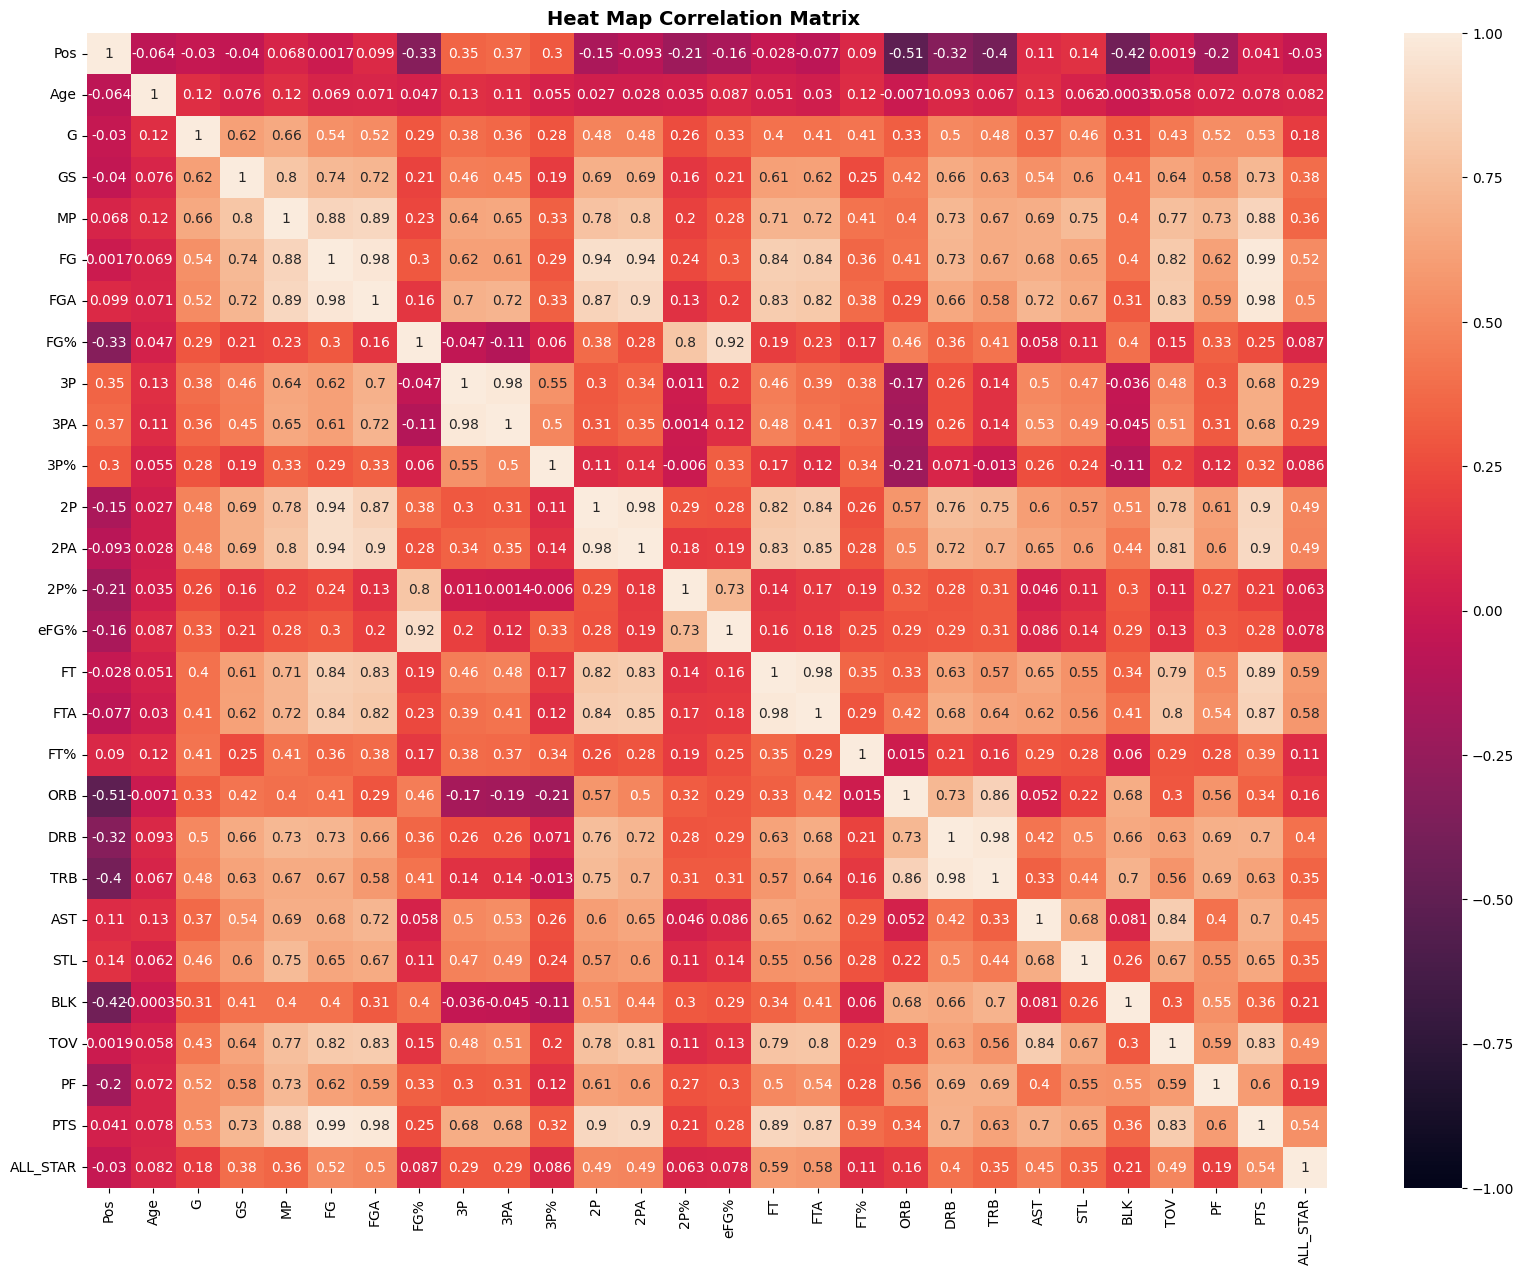

In [35]:
#displaying the correlation matrix
plt.figure(dpi =100, figsize=(20, 15))
sns.heatmap(correlation, annot = True, vmax=1, vmin=-1)
plt.title('Heat Map Correlation Matrix ', fontsize=14, fontweight='bold')
plt.show()

### SelectKBest Feature Selection Method

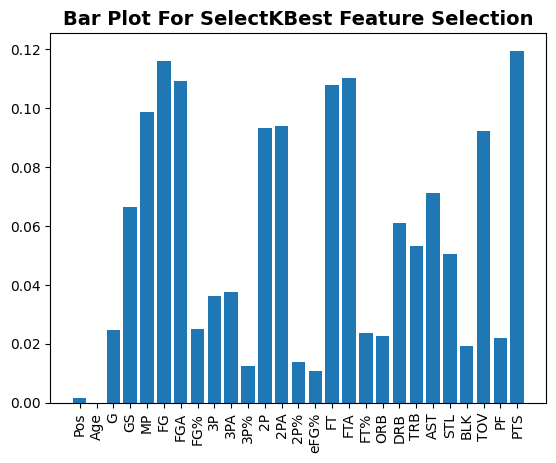

In [36]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

predictors = df3.columns.drop('ALL_STAR')

# Perform the feature selection
selector = SelectKBest(mutual_info_classif, k="all")
selector.fit(df3[predictors], df3['ALL_STAR'])
scores = selector.scores_

# Use plt to plot the scores
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.title('Bar Plot For SelectKBest Feature Selection', fontsize=14, fontweight='bold')
plt.show()


<span style="font-size:16px; font-family:Monospace;"> According to the pearson's coefficient result given above, the following variables have more than 40% correlation with the target variable.

FG, FGA, 2P, 2PA, FT, FTA, AST, TOV, PTS </span>

<span style="font-size:16px; font-family:Monospace;"> For the SelectKbest feature selection method, I set the threshold to 0.08. Any variable above 0.08 has good correlation with the target variable. The following features were selected.
MP, FG, FGA, 2P, 2PA, FT, FTA, TOV, PTS.
The difference in both methods - Pearsons coefficient shows that AST has a correlation with the target variable, whilst SelectKBest shows that MP has a correlation.</span>

In [37]:
# POS - Position
# AGE - Age
# G - Number of games played
# GS - Number of games Started
# MP - Minutes played per game
# FG - Field Goals per game
# FGA - Field Goals Attempts per game
# FG% - Field Goals percentage per game
# 3P - 3 points field goals per game
# 3PA - 3 points field goals attempts per game
# 3P% - 3 points field goals percentage
# 2P - 2 points field goals per game
# 2PA - 2 points field goals attempts per game
# 2P% - 2 points field goals percentage
# eFG% - Effective field goals percentage(adjusts for the fact that 3pts FG is worth more than 2pts FG)
# FT - Free throws per game
# FTA - Free throws attempts per game
# FT% - Free throw percentage
# ORB - Offensive rebounds per game
# DRB - Defensive rebounds per game
# TRB - Total rebounds per game
# AST - Assists per game
# STL - Steals per game
# BLK - Blocks per game
# TOV - Turnovers per game
# PF - Personal Fouls per game
# PTS - Points per game

# MODEL BUILDING - CLASSIFICATION

In [38]:
#defining the feature matrix, X and target variable, y. 
X = df3[['FG','FGA','2P','2PA','FT', 'FTA', 'MP', 'TOV', 'PTS']]
y = df3['ALL_STAR']

In [39]:
X

,FG,FGA,2P,2PA,FT,FTA,MP,TOV,PTS
0,2.2,4.9,2.0,4.0,1.1,1.4,18.9,0.9,5.9
1,1.2,2.9,0.8,2.0,0.5,0.8,8.3,0.5,3.1
2,3.1,5.7,3.1,5.7,1.5,2.9,25.3,1.4,7.7
3,1.1,2.6,1.1,2.6,1.3,2.2,12.6,0.5,3.5
4,4.8,11.3,3.3,7.1,2.1,2.5,32.1,1.5,13.3
...,...,...,...,...,...,...,...,...,...
4193,2.7,5.2,2.4,4.3,0.4,0.9,16.3,1.0,6.2
4194,9.4,20.3,6.3,12.3,6.6,7.3,34.9,4.0,28.4
4195,2.3,4.4,2.3,4.2,0.7,1.1,12.6,0.7,5.3
4196,1.9,3.3,1.9,3.2,1.4,1.8,13.1,0.7,5.2


In [40]:
#scaling out numeric data to range between 0 & 1, for uniformity in ranges
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [41]:
#split the data into training data and testing data. training size is made to be 80% and 20% to testing

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,train_size=0.8,random_state=42)

### OVERSAMPLING - SYNTHETIC MINORITY OVER-SAMPLING TECHNIQUE

<span style="font-size:16px; font-family:Monospace;">Since the target varible is not balanced, there's a need to balance it to optimise the performance of the model. I'll be using SMOTE as my chosen oversampling technique to deal with this problem. A visualisation of the target variable shows this imbalance.</span>

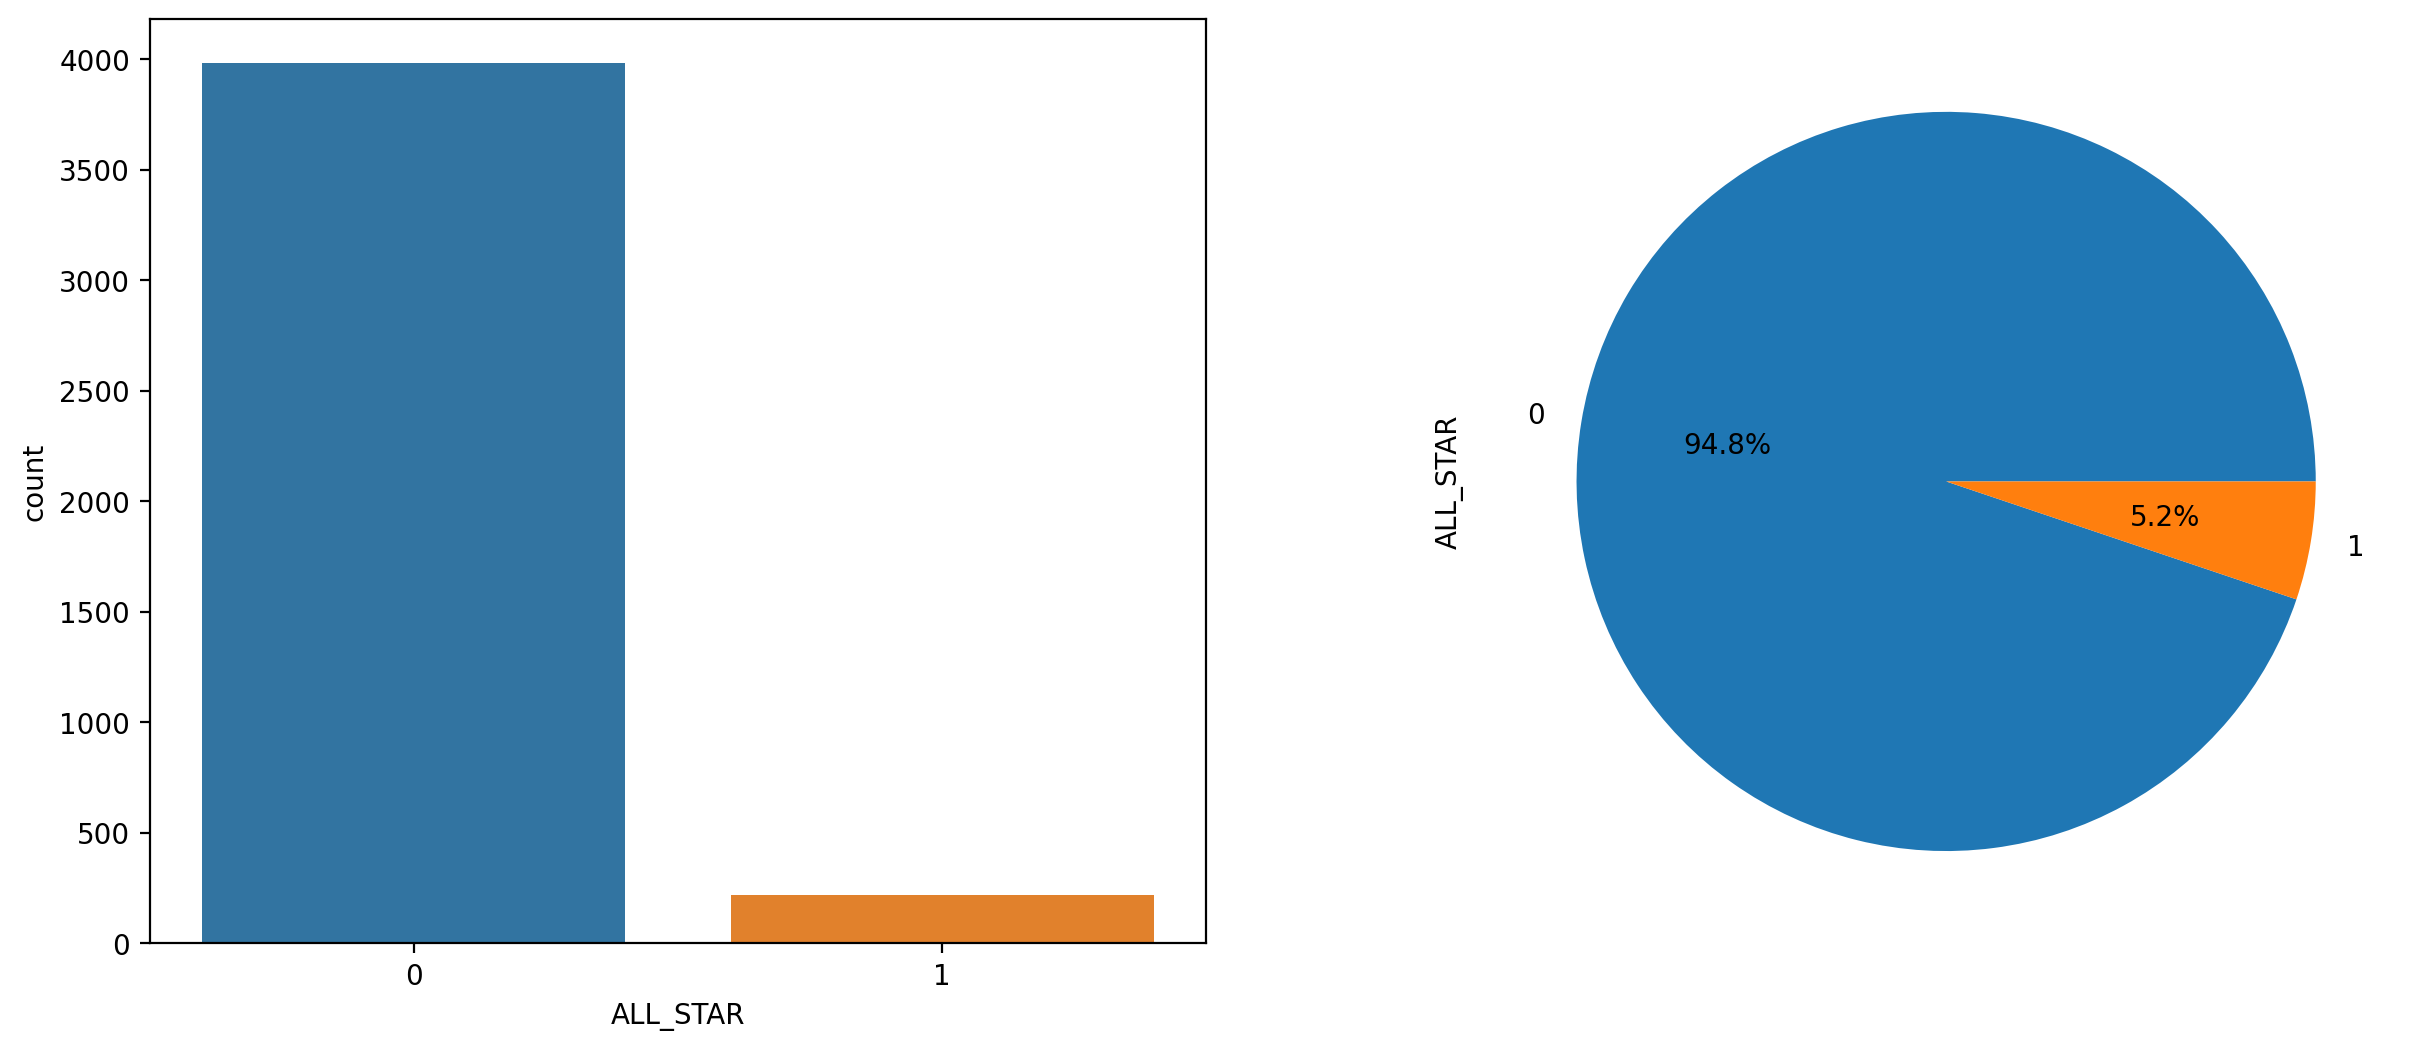

In [42]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting
a = sns.countplot(x='ALL_STAR', data=df3, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0
a= df3['ALL_STAR'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1

In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created 
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

<span style="font-size:16px; font-family:Monospace;">By applying SMOTE to the dataset, the target variable has now been balanced. we can visualise this below.</span>

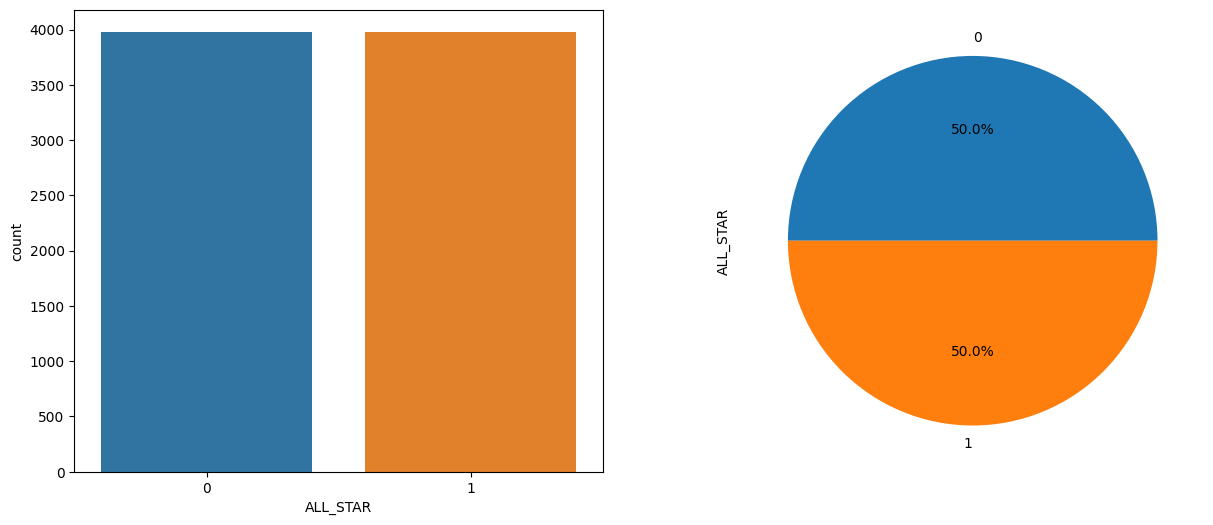

In [45]:
# Plot of the dataset 
df_bal = pd.concat([X_res,y_res], axis = 1) # creating a dataframe for the balanced data
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='ALL_STAR',data=df_bal, ax=ax[0]) # assigning each of the plot to the axis shell
a= df_bal['ALL_STAR'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning each of the plot to the axis shell

In [46]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
#scaling the dataset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

### BUILDING THE BASE MODELS

# RANDOM FOREST

In [48]:
ranformodel = RandomForestClassifier() # Create an instance of the RandomForestClassifier

In [49]:
# Define class labels (0: Non All-Star, 1: All-Star)
class_labels = ['Non All-Star', 'All-Star']

              precision    recall  f1-score   support

Non All-Star       0.99      0.96      0.98       797
    All-Star       0.96      0.99      0.98       796

    accuracy                           0.98      1593
   macro avg       0.98      0.98      0.98      1593
weighted avg       0.98      0.98      0.98      1593



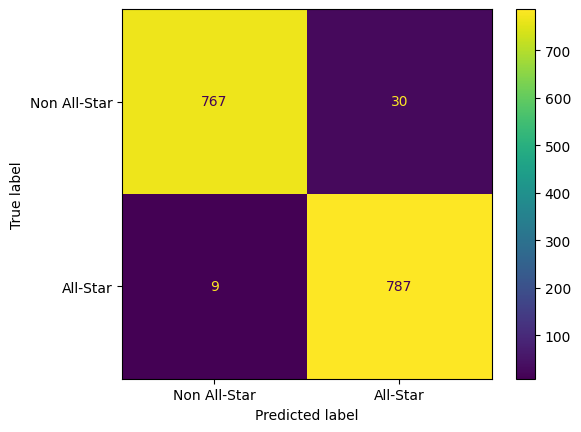

<Figure size 8000x8000 with 0 Axes>

In [50]:
# The model test report
def ranforest_model_test(ranformodel):
    ranformodel.fit(X_train_scaled,y_train) # Fit the RandomForestClassifier on the scaled training data
    preds = ranformodel.predict(X_test_scaled) # Make predictions on the scaled test data
    print(classification_report(y_test,preds, target_names=class_labels))# Print a classification report showing precision, recall, F1-score, and support for each class
    ConfusionMatrixDisplay.from_estimator(ranformodel, X_test_scaled, y_test, display_labels=class_labels)
    plt.show() #displaying the confusion matrix
    plt.figure(figsize=(40,40), dpi = 200);
 
 
ranforest_model_test(ranformodel)

# DECISION TREE

In [51]:
decmodel = DecisionTreeClassifier()

              precision    recall  f1-score   support

Non All-Star       0.96      0.95      0.96       797
    All-Star       0.95      0.96      0.96       796

    accuracy                           0.96      1593
   macro avg       0.96      0.96      0.96      1593
weighted avg       0.96      0.96      0.96      1593



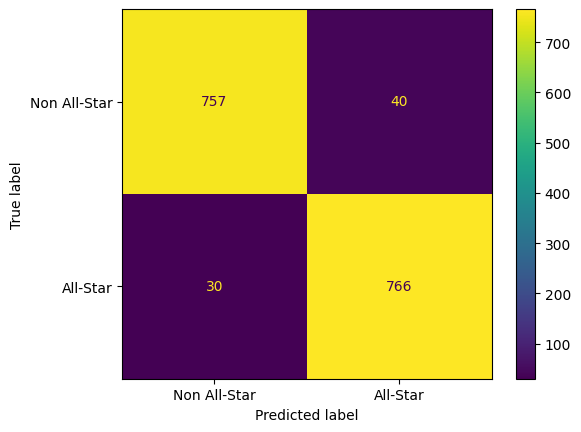

<Figure size 8000x8000 with 0 Axes>

In [52]:
# The model test report
def dectree_model_test(decmodel):
    decmodel.fit(X_train_scaled,y_train) # Fit the decisiontreeclassifier on the scaled training data
    preds = decmodel.predict(X_test_scaled) #predicting on test data
    print(classification_report(y_test,preds, target_names=class_labels)) #printing the classification report
    ConfusionMatrixDisplay.from_estimator(decmodel,X_test_scaled, y_test, display_labels=class_labels)
    plt.show() #plotting the confusion matrix
    plt.figure(figsize=(40,40), dpi = 200);
    #plot_tree(decmodel, feature_names = X.columns, filled = True, fontsize=20 );

dectree_model_test(decmodel)

# KNN

In [53]:
knnmodel =  KNeighborsClassifier()

              precision    recall  f1-score   support

Non All-Star       1.00      0.91      0.95       797
    All-Star       0.92      1.00      0.96       796

    accuracy                           0.95      1593
   macro avg       0.96      0.95      0.95      1593
weighted avg       0.96      0.95      0.95      1593



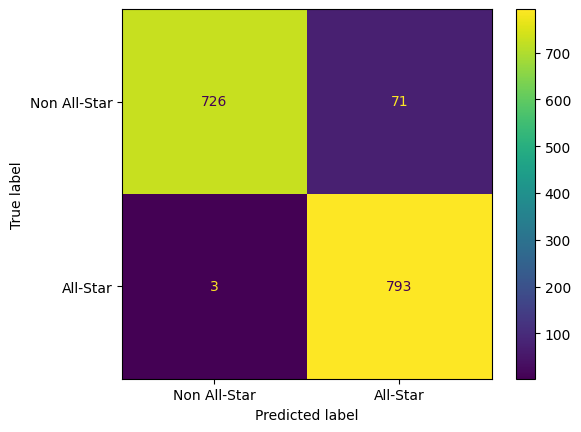

<Figure size 8000x8000 with 0 Axes>

In [54]:
# The model test report
def knn_model_test(knnmodel):
    knnmodel.fit(X_train_scaled,y_train)
    preds = knnmodel.predict(X_test_scaled) 
    print(classification_report(y_test,preds, target_names=class_labels))
    ConfusionMatrixDisplay.from_estimator(knnmodel, X_test_scaled, y_test, display_labels=class_labels)
    plt.show()
    plt.figure(figsize=(40,40), dpi = 200);
 
 
knn_model_test(knnmodel)

# LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()

In [56]:
# The model test report
def logreg_model_test(lrmodel):
    lrmodel.fit(X_train_scaled,y_train)
    preds = lrmodel.predict(X_test_scaled) 
    print(classification_report(y_test,preds, target_names=class_labels))
    ConfusionMatrixDisplay.from_estimator(lrmodel, X_test_scaled, y_test, display_labels=class_labels)
    plt.show()
    plt.figure(figsize=(40,40), dpi = 200);
    
    return lrmodel
 

              precision    recall  f1-score   support

Non All-Star       0.95      0.90      0.93       797
    All-Star       0.90      0.95      0.93       796

    accuracy                           0.93      1593
   macro avg       0.93      0.93      0.93      1593
weighted avg       0.93      0.93      0.93      1593



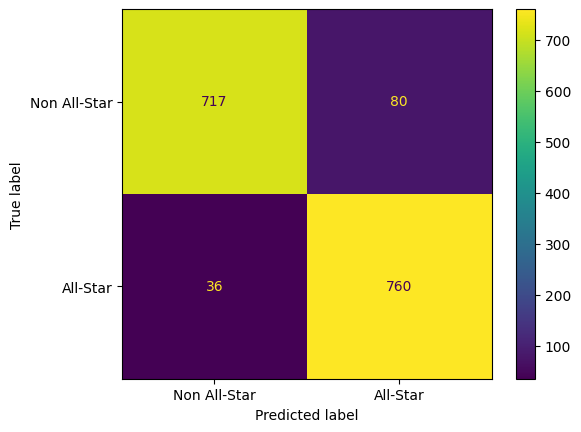

<Figure size 8000x8000 with 0 Axes>

In [57]:
lrmodel = logreg_model_test(lrmodel)

# SVM

In [58]:
svmmodel = SVC()

              precision    recall  f1-score   support

Non All-Star       0.96      0.90      0.93       797
    All-Star       0.91      0.96      0.93       796

    accuracy                           0.93      1593
   macro avg       0.93      0.93      0.93      1593
weighted avg       0.93      0.93      0.93      1593



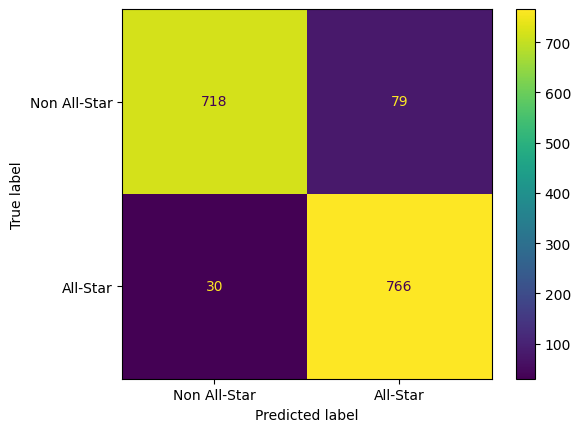

<Figure size 8000x8000 with 0 Axes>

In [59]:
# The model test report
def svc_model_test(svmmodel):
    svmmodel.fit(X_train_scaled,y_train)
    preds = svmmodel.predict(X_test_scaled) 
    print(classification_report(y_test,preds, target_names=class_labels))
    ConfusionMatrixDisplay.from_estimator(svmmodel, X_test_scaled, y_test, display_labels=class_labels)
    plt.show()
    plt.figure(figsize=(40,40), dpi = 200);
 
 
svc_model_test(svmmodel)

### CROSS VALIDATION

Cross validation is a way to measure how well a classification model can handle new data that it has not seen before. It splits the data into k parts, or folds, and trains the model on k-1 parts while testing it on the left-out part. This is done k times, so that every part is used as a test set once. The average performance of the model on the k parts is then used as an estimate of its accuracy.

Cross validation is important for classification models because it helps to prevent overfitting, which happens when the model learns the details or patterns in the training data that do not apply to new data. By testing the model on different parts of the data, cross validation can show how well the model can deal with different variations in the data. Cross validation also helps to reduce bias and variance in the model evaluation, by using more data for both training and testing than a single split.

In [60]:
# Appending several models for cross validation
models = []
models.append(("LR",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("SVC",SVC()))
models.append(("RF",RandomForestClassifier()))
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('Dtree', DecisionTreeClassifier()),
 ('SVC', SVC()),
 ('RF', RandomForestClassifier())]

creating a function to take a list of the models as an argument and loops through them in k-folds of 5.

In [61]:
from sklearn.model_selection import cross_validate, KFold, cross_val_score

In [62]:
from sklearn.model_selection import cross_val_score

def cross_val_report(models):
    # Initialize an empty list to store cross-validation scores
    crossval_scores = []
    
    # Iterate through the list of models
    for name, model in models:
        # Perform 5-fold cross-validation and get the accuracy scores for each fold
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        
        # Separate the individual cross-validation scores
        cv1, cv2, cv3, cv4, cv5 = cv_scores
        
        # Calculate the mean of the cross-validation scores
        cv_scores_mean = cv_scores.mean()
        
        # Append the model name, individual scores, and mean score to the crossval_scores list
        crossval_scores.append((name, cv1, cv2, cv3, cv4, cv5, cv_scores_mean))
    
    # Return the list of cross-validation scores
    return crossval_scores


In [63]:
report = cross_val_report(models)
report

C:\Users\Dell_Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell_Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

[('LR',
  0.9440628066732091,
  0.9234543670264965,
  0.929342492639843,
  0.9234543670264965,
  0.9509322865554465,
  0.9342492639842984),
 ('KNN',
  0.9627085377821394,
  0.9587831207065751,
  0.9401373895976447,
  0.9548577036310107,
  0.9735034347399412,
  0.9579980372914623),
 ('Dtree',
  0.9607458292443573,
  0.957801766437684,
  0.9421000981354269,
  0.9597644749754661,
  0.9627085377821394,
  0.9566241413150148),
 ('SVC',
  0.9401373895976447,
  0.9205103042198234,
  0.9273797841020608,
  0.9234543670264965,
  0.9499509322865555,
  0.9322865554465162),
 ('RF',
  0.9793915603532876,
  0.9764474975466143,
  0.9676153091265947,
  0.9705593719332679,
  0.9901864573110893,
  0.9768400392541707)]

In [64]:
reportDf = pd.DataFrame(report, columns=['Model', 'cv1 score', 'cv2 score', 'cv3 score', 'cv4 score', 'cv5 score','avg score'])
reportDf

,Model,cv1 score,cv2 score,cv3 score,cv4 score,cv5 score,avg score
0,LR,0.944063,0.923454,0.929342,0.923454,0.950932,0.934249
1,KNN,0.962709,0.958783,0.940137,0.954858,0.973503,0.957998
2,Dtree,0.960746,0.957802,0.942100,0.959764,0.962709,0.956624
3,SVC,0.940137,0.920510,0.927380,0.923454,0.949951,0.932287
4,RF,0.979392,0.976447,0.967615,0.970559,0.990186,0.976840


LR
              precision    recall  f1-score   support

Non All-Star       0.95      0.90      0.93       797
    All-Star       0.90      0.95      0.93       796

    accuracy                           0.93      1593
   macro avg       0.93      0.93      0.93      1593
weighted avg       0.93      0.93      0.93      1593



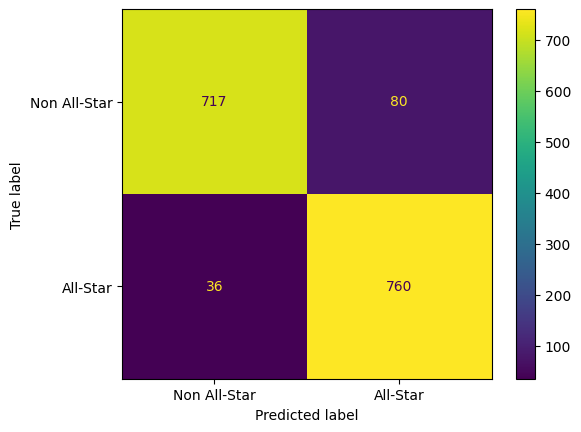

KNN
              precision    recall  f1-score   support

Non All-Star       1.00      0.91      0.95       797
    All-Star       0.92      1.00      0.96       796

    accuracy                           0.95      1593
   macro avg       0.96      0.95      0.95      1593
weighted avg       0.96      0.95      0.95      1593



<Figure size 8000x8000 with 0 Axes>

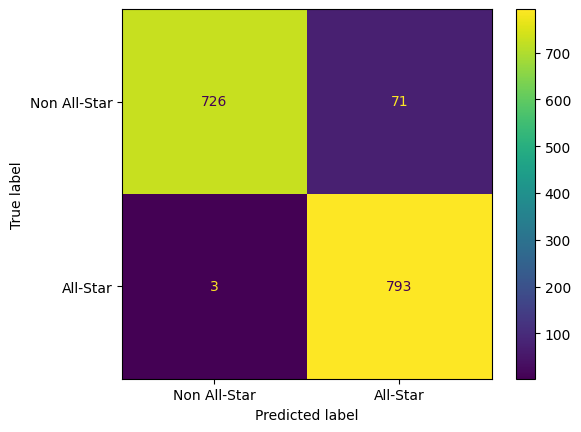

Dtree
              precision    recall  f1-score   support

Non All-Star       0.96      0.95      0.96       797
    All-Star       0.95      0.96      0.96       796

    accuracy                           0.96      1593
   macro avg       0.96      0.96      0.96      1593
weighted avg       0.96      0.96      0.96      1593



<Figure size 8000x8000 with 0 Axes>

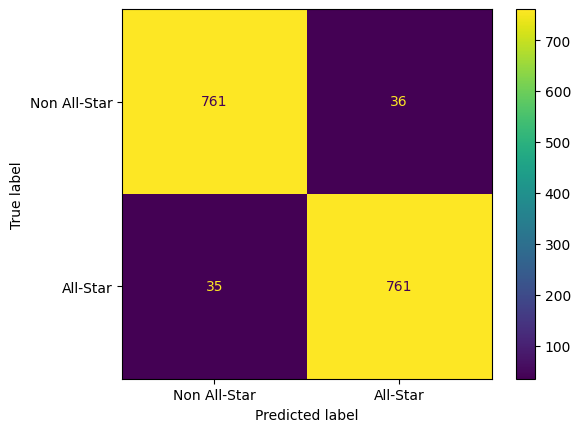

SVC
              precision    recall  f1-score   support

Non All-Star       0.96      0.90      0.93       797
    All-Star       0.91      0.96      0.93       796

    accuracy                           0.93      1593
   macro avg       0.93      0.93      0.93      1593
weighted avg       0.93      0.93      0.93      1593



<Figure size 8000x8000 with 0 Axes>

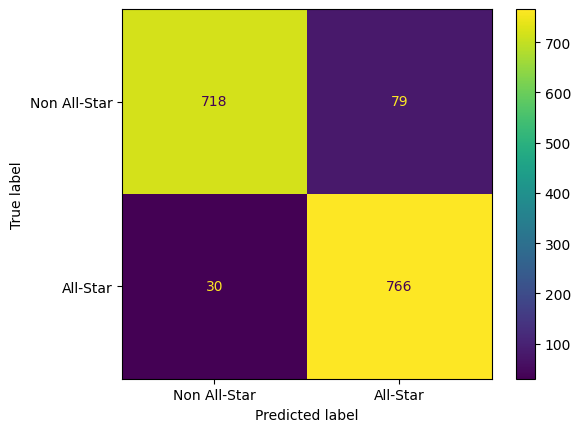

RF
              precision    recall  f1-score   support

Non All-Star       0.99      0.96      0.98       797
    All-Star       0.96      0.99      0.98       796

    accuracy                           0.98      1593
   macro avg       0.98      0.98      0.98      1593
weighted avg       0.98      0.98      0.98      1593



<Figure size 8000x8000 with 0 Axes>

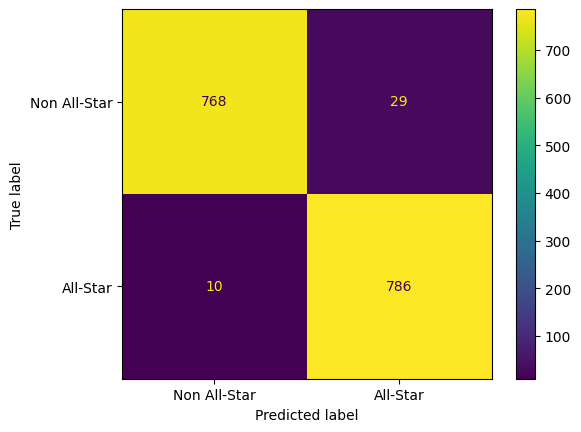

<Figure size 8000x8000 with 0 Axes>

In [65]:
# The model test report
def report_model_test(models):
    for name,model in models:
        model.fit(X_train_scaled,y_train)
        preds = model.predict(X_test_scaled)
        print(name)
        print(classification_report(y_test,preds, target_names=class_labels))
        ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, display_labels=class_labels)
        plt.show()
        plt.figure(figsize=(40,40), dpi = 200);
 
 
report_model_test(models)

# NEURAL NETWORKS

In [66]:
import numpy as np
import tensorflow as tf

In [67]:
# Define a neural network model using the Keras Sequential API
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [68]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/50
160/160 [==============================] - 1s 2ms/step - loss: 0.3609 - accuracy: 0.8502 - val_loss: 0.2112 - val_accuracy: 0.9231
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9242 - val_loss: 0.1967 - val_accuracy: 0.9286
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9260 - val_loss: 0.1911 - val_accuracy: 0.9278
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9289 - val_loss: 0.1921 - val_accuracy: 0.9262
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9291 - val_loss: 0.1872 - val_accuracy: 0.9246
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9284 - val_loss: 0.1900 - val_accuracy: 0.9317
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.9311 - val_loss: 0.1822 - val_accuracy: 0.9333
Epoch 

In [70]:
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

50/50 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.9309
Test Loss: 0.1769
Test Accuracy: 0.9309


50/50 [==============================] - 0s 1ms/step


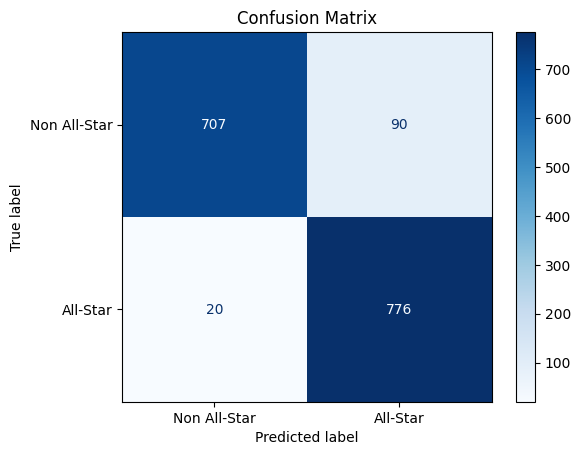

              precision    recall  f1-score   support

Non All-Star       0.97      0.89      0.93       797
    All-Star       0.90      0.97      0.93       796

    accuracy                           0.93      1593
   macro avg       0.93      0.93      0.93      1593
weighted avg       0.93      0.93      0.93      1593



In [71]:
# Obtain the predicted labels from the trained model
predictions = nn_model.predict(X_test_scaled)
predicted_labels = np.round(predictions).flatten().astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Define class labels (0: Non All-Star, 1: All-Star)
class_labels = ['Non All-Star', 'All-Star']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, predicted_labels, target_names=class_labels)
print(report)

# Hyperparameter tuning using GridSearchCV

In this section, we will be hypertuning the models. 
Hyperparameter tuning is a critical aspect of machine learning and model development. It involves finding the optimal values for the hyperparameters of a machine learning algorithm. Hyperparameters are settings that are not learned directly from the data during model training but are set before training begins. They significantly influence a model's performance and behavior. It improves model performance and also prevents overfitting and overfitting, amongst other important characteristics.

In [72]:
from sklearn.model_selection import GridSearchCV # importing GridSearchCV

### Logistic Regression

In [73]:
hlrmodel = LogisticRegression(C=0.001) # instiatiate the model

In [74]:
grid_param = {
 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'penalty':['l2', 'elasticnet', 'none']
} # declaring the parameter to tune with 

In [75]:
gd_lr = GridSearchCV(estimator=hlrmodel,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1) # instantiating an object of GridSearchCV

In [76]:
hlrmodel.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001)

In [77]:
gd_lr.fit(X_train_scaled, y_train) # fitting the object

C:\Users\Dell_Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell_Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell_Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Dell_Laptop\AppD

GridSearchCV(cv=5, estimator=LogisticRegression(C=0.001), n_jobs=-1,
             param_grid={'penalty': ['l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [78]:
gd_lr.best_estimator_

LogisticRegression(C=0.001, penalty='none', solver='saga')

In [79]:
accuracy = gd_lr.best_score_ *100

In [80]:
accuracy

93.40529931305201

In [81]:
# Training and evaluating the grid model
def report_model_test(gd_lr):
    hlrmodel = gd_lr.best_estimator_
    
    hlrmodel.fit(X_train_scaled,y_train)
    preds = hlrmodel.predict(X_test_scaled) 
    print(classification_report(y_test,preds, target_names=class_labels))
    # Calculate AUC ROC score
    probas = hlrmodel.predict_proba(X_test_scaled)
    auc_roc = roc_auc_score(y_test, probas[:, 1])
    print("AUC ROC Score:", auc_roc)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
    
    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, lw=2, color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve", size=14)
    plt.text(s=f'{round(auc_roc, 2)}', x=.5, y=.5)
    plt.fill_between(fpr, tpr, alpha=0.2)
    plt.show()

    ConfusionMatrixDisplay.from_estimator(hlrmodel, X_test_scaled, y_test, display_labels=class_labels)
    plt.show()
    plt.figure(figsize=(40,40), dpi = 200);
    return hlrmodel
 

C:\Users\Dell_Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


              precision    recall  f1-score   support

Non All-Star       0.95      0.91      0.93       797
    All-Star       0.91      0.96      0.93       796

    accuracy                           0.93      1593
   macro avg       0.93      0.93      0.93      1593
weighted avg       0.93      0.93      0.93      1593

AUC ROC Score: 0.9761810936741423


C:\Users\Dell_Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


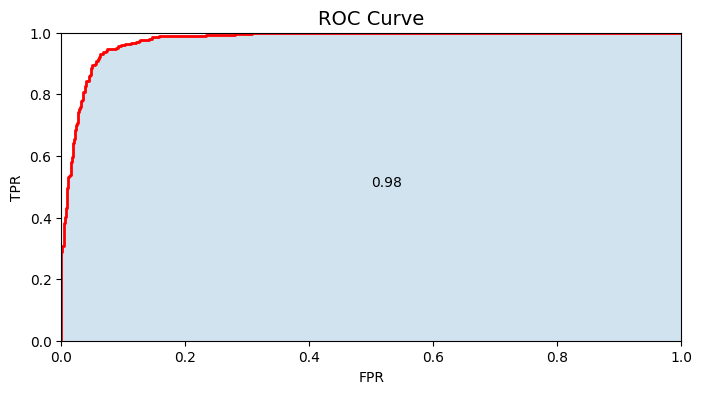

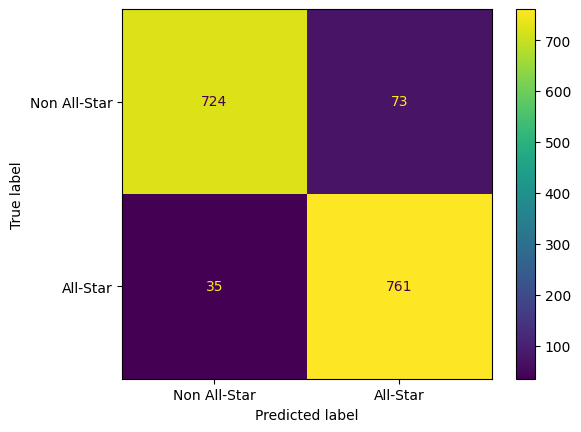

<Figure size 8000x8000 with 0 Axes>

In [82]:
hlrmodel = report_model_test(gd_lr) # using the gridsearch model to predict

### DECISION TREE

In [83]:
hdecmodel = DecisionTreeClassifier()

In [84]:
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(3, 15)}]

In [85]:
hdec_clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

In [86]:
hdec_clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}])

In [87]:
hdec_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=14)

In [88]:
accuracy = hdec_clf.best_score_ *100

In [89]:
accuracy

96.6045142296369

              precision    recall  f1-score   support

Non All-Star       0.97      0.95      0.96       797
    All-Star       0.95      0.97      0.96       796

    accuracy                           0.96      1593
   macro avg       0.96      0.96      0.96      1593
weighted avg       0.96      0.96      0.96      1593

AUC ROC Score: 0.9629491560689268


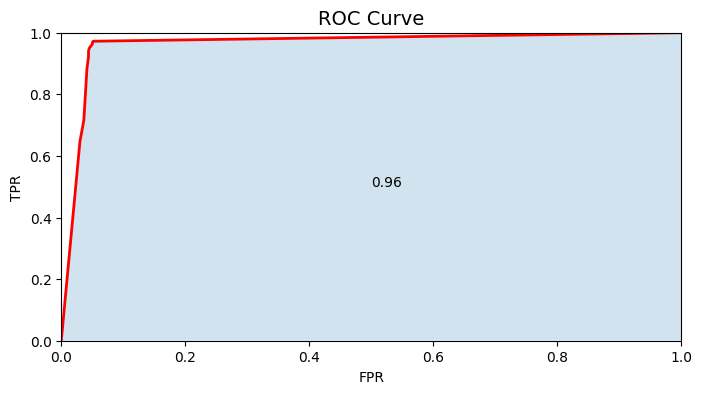

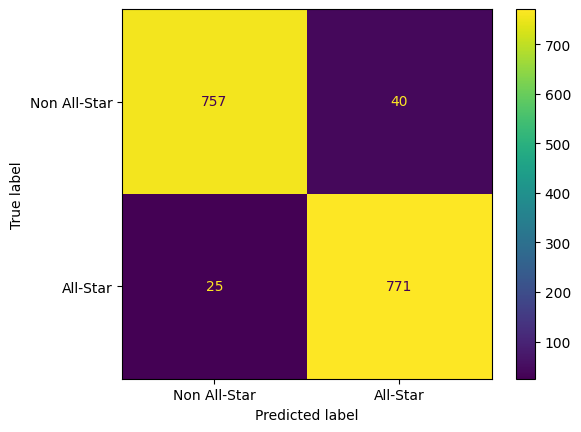

<Figure size 8000x8000 with 0 Axes>

In [90]:
# Training and evaluating the grid model
def report_model_test(hdec_clf):
    hdecmodel = hdec_clf.best_estimator_
    
    hdecmodel.fit(X_train_scaled,y_train)
    preds = hdecmodel.predict(X_test_scaled) 
    print(classification_report(y_test,preds, target_names=class_labels))
    
    # Calculate AUC ROC score
    probas = hdecmodel.predict_proba(X_test_scaled)
    auc_roc = roc_auc_score(y_test, probas[:, 1])
    print("AUC ROC Score:", auc_roc)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
    
    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, lw=2, color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve", size=14)
    plt.text(s=f'{round(auc_roc, 2)}', x=.5, y=.5)
    plt.fill_between(fpr, tpr, alpha=0.2)
    plt.show()

    
    ConfusionMatrixDisplay.from_estimator(hdecmodel, X_test_scaled, y_test, display_labels=class_labels)
    plt.show()
    plt.figure(figsize=(40,40), dpi = 200);
 
 
report_model_test(hdec_clf) # using the gridsearch model to predict

### SVM

In [91]:
hsvc = SVC()

In [92]:
#instantiating the hyperparameters for tuning
svc_param = [{'C': [1,10,100], 'kernel': ['rbf']}]

In [93]:
gd_svc = GridSearchCV(estimator= hsvc,
                          param_grid = svc_param, scoring = 'recall',cv = 5) #applying GridSearch

In [94]:
gd_svc = gd_svc.fit(X_train_scaled, y_train)

In [95]:
gd_svc

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['rbf']}],
             scoring='recall')

In [96]:
gd_svc.best_estimator_

SVC(C=100)

In [97]:
accuracy = gd_svc.best_score_ *100

In [98]:
accuracy

97.61252446183953

              precision    recall  f1-score   support

Non All-Star       0.98      0.93      0.95       797
    All-Star       0.93      0.98      0.95       796

    accuracy                           0.95      1593
   macro avg       0.95      0.95      0.95      1593
weighted avg       0.95      0.95      0.95      1593

AUC ROC Score cannot be calculated because `predict_proba` is not available.


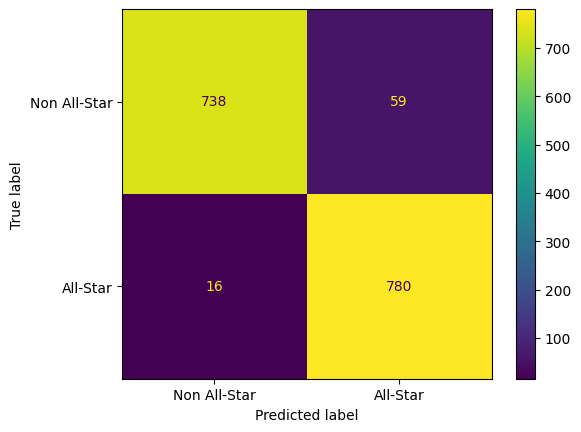

<Figure size 8000x8000 with 0 Axes>

In [99]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Training and evaluating the grid model
def report_model_test(gd_svc):
    hsvc = gd_svc.best_estimator_

    hsvc.fit(X_train_scaled, y_train)
    preds = hsvc.predict(X_test_scaled) 
    print(classification_report(y_test, preds, target_names=class_labels))
    
    if hasattr(hsvc, "predict_proba"):
        # Calculate AUC ROC score
        probas = hsvc.predict_proba(X_test_scaled)
        auc_roc = roc_auc_score(y_test, probas[:, 1])
        print("AUC ROC Score:", auc_roc)

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
        
        plt.figure(figsize=(8, 4))
        plt.plot(fpr, tpr, lw=2, color='red')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC Curve", size=14)
        plt.text(s=f'{round(auc_roc, 2)}', x=.5, y=.5)
        plt.fill_between(fpr, tpr, alpha=0.2)
        plt.show()
    else:
        print("AUC ROC Score cannot be calculated because `predict_proba` is not available.")

    ConfusionMatrixDisplay.from_estimator(hsvc, X_test_scaled, y_test, display_labels=class_labels)
    plt.show()
    plt.figure(figsize=(40, 40), dpi=200)

report_model_test(gd_svc)

### KNN

In [100]:
hknn = KNeighborsClassifier()

In [101]:
knn_param = {'n_neighbors': [1, 30, 2]} #instantiating the hyperparameters for tuning

In [102]:
gd_knn = GridSearchCV(estimator=hknn, param_grid=knn_param, scoring='recall', cv=5) #applying GridSearch

In [103]:
gd_knn = gd_knn.fit(X_train_scaled, y_train) #fitting the tuned model

In [104]:
gd_knn

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 30, 2]}, scoring='recall')

In [105]:
gd_knn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [106]:
accuracy = gd_knn.best_score_ *100

In [107]:
accuracy

99.80430528375734

              precision    recall  f1-score   support

Non All-Star       1.00      0.95      0.97       797
    All-Star       0.95      1.00      0.97       796

    accuracy                           0.97      1593
   macro avg       0.97      0.97      0.97      1593
weighted avg       0.97      0.97      0.97      1593

AUC ROC Score: 0.9723941224314798


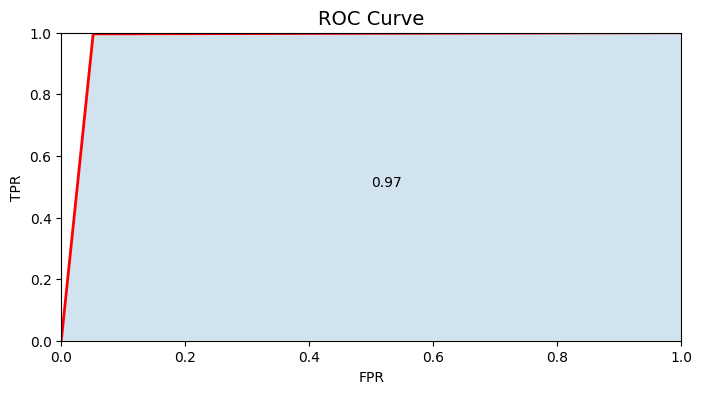

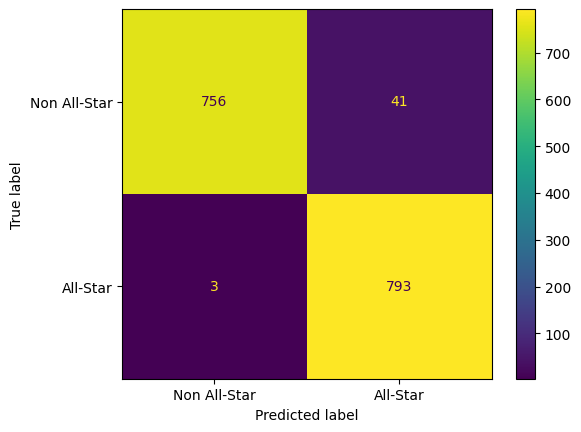

<Figure size 8000x8000 with 0 Axes>

In [108]:
# Training and evaluating the grid model
def report_model_test(gd_knn):
    hknn = gd_knn.best_estimator_
    
    hknn.fit(X_train_scaled,y_train)
    preds = hknn.predict(X_test_scaled) 
    print(classification_report(y_test,preds, target_names=class_labels))
    # Calculate AUC ROC score
    probas = hknn.predict_proba(X_test_scaled)
    auc_roc = roc_auc_score(y_test, probas[:, 1])
    print("AUC ROC Score:", auc_roc)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
    
    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, lw=2, color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve", size=14)
    plt.text(s=f'{round(auc_roc, 2)}', x=.5, y=.5)
    plt.fill_between(fpr, tpr, alpha=0.2)
    plt.show()

    ConfusionMatrixDisplay.from_estimator(hknn, X_test_scaled, y_test, display_labels=class_labels)
    plt.show()
    plt.figure(figsize=(40,40), dpi = 200);
 
 
report_model_test(gd_knn) # using the gridsearch model to predict

### RANDOM FOREST

In [109]:
rf_model = RandomForestClassifier()

In [110]:
#
rf_param = { 
    'n_estimators': [100, 3000],
    'max_depth' : [4,5,6,7,8],
    'min_samples_split': [2, 5, 10]
}

In [111]:
ranforest = GridSearchCV(estimator=rf_model, param_grid=rf_param, scoring='recall', cv=5)

In [112]:
ranforest.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 3000]},
             scoring='recall')

In [113]:
ranforest.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_split=5)

In [114]:
accuracy = ranforest.best_score_ *100

In [115]:
accuracy

98.94324853228962

In [116]:
# Training and evaluating the grid model
def report_model_test(ranforest):
    rf_model = ranforest.best_estimator_
    rf_model.fit(X_train_scaled,y_train)
    preds = rf_model.predict(X_test_scaled) 
    print(classification_report(y_test,preds, target_names=class_labels))
    # Calculate AUC ROC score
    probas = rf_model.predict_proba(X_test_scaled)
    auc_roc = roc_auc_score(y_test, probas[:, 1])
    print("AUC ROC Score:", auc_roc)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
    
    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, lw=2, color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve", size=14)
    plt.text(s=f'{round(auc_roc, 2)}', x=.5, y=.5)
    plt.fill_between(fpr, tpr, alpha=0.2)
    plt.show()

    ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test, display_labels=class_labels)
    plt.show()
    plt.figure(figsize=(40,40), dpi = 200);
 
 
# report_model_test(ranforest) # using the gridsearch model to predict

              precision    recall  f1-score   support

Non All-Star       0.98      0.95      0.97       797
    All-Star       0.95      0.98      0.97       796

    accuracy                           0.97      1593
   macro avg       0.97      0.97      0.97      1593
weighted avg       0.97      0.97      0.97      1593

AUC ROC Score: 0.9901625442141699


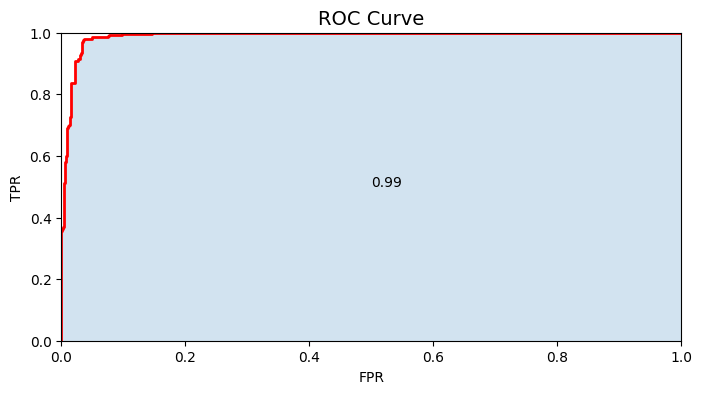

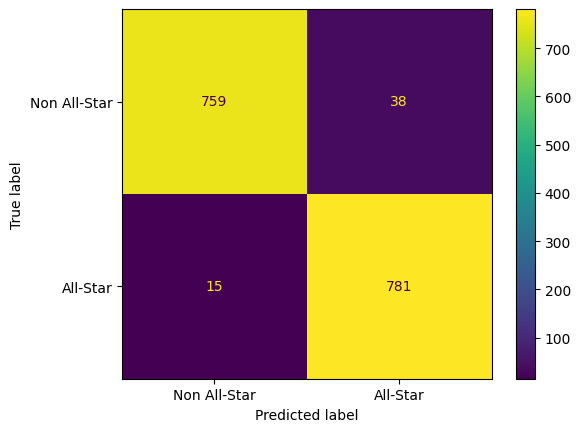

<Figure size 8000x8000 with 0 Axes>

In [117]:
report_model_test(ranforest) # using the gridsearch model to predict

# USING XGBOOST

XGBoost is a machine learning algorithm that uses gradient boosting to create powerful prediction models from many weak ones, usually decision trees. It adds new decision trees that correct the errors of the previous ones in each step. XGBoost is fast, scalable, and effective for various supervised learning problems, such as classification, regression, and ranking.

XGBoost has many features and optimisations that enhance its performance, such as regularisation, parallel processing, and handling missing values. It also allows users to customise loss functions and evaluation metrics for different problems.

In [118]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, mean_squared_error


# Instatiating the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective="binary:logistic", random_state=0)

In [119]:
params = {
    "max_depth":[10,15,20,25,30],
    "n_estimators":[200,400,600,800,1000]
}

In [120]:
scoring_metric = make_scorer(mean_squared_error, greater_is_better=False)

In [121]:
clf = GridSearchCV(xgb_model, params, cv=5, scoring=scoring_metric)

In [122]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='binary:logistic', predictor=None, ...),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [123]:
clf.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=25, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             objective='binary:logistic', predictor=None, ...)

In [171]:
# Fitting the model to the training data
xgb_model.fit(X_train_scaled, y_train)

# Making predictions on the testing data
y_pred = xgb_model.predict(X_test_scaled)

# # Evaluate the accuracy of the model
mean_squared_ = mean_squared_error(y_test, y_pred)
print(f"The coefficient of determination is: {r2_score(y_test, y_pred):.4f}")
print(f"The root mean squared error is: {np.sqrt(mean_squared_):.4f}")

The coefficient of determination is: 0.9093
The mean squared error is: 0.1506


In [172]:
y_pred

array([1.28164407e-04, 3.77817982e-04, 1.15865073e-03, ...,
       1.04468745e-04, 8.57384741e-01, 9.96164799e-01], dtype=float32)

In [179]:
def report_model_test(clf):
    clf.fit(X_train_scaled, y_train)
    preds = clf.predict(X_test_scaled)
    mean_abs = mean_absolute_error(y_test, preds)
    mean_squared = mean_squared_error(y_test, preds)
    print(f"The root mean squared error is: {np.sqrt(mean_squared):.4f}")
    print(f"The coefficient of determination is: {r2_score(y_test, preds):.4f}")

    return clf

report_model_test(clf)

The root mean squared error is: 0.1510
The coefficient of determination is: 0.9087


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='binary:logistic', predictor=None, ...),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [174]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, RocCurveDisplay, plot_confusion_matrix

In [176]:
fpr, tpr, thresh = roc_curve(y_test, y_pred)

In [177]:
auc(fpr,tpr)

0.9945224869643071

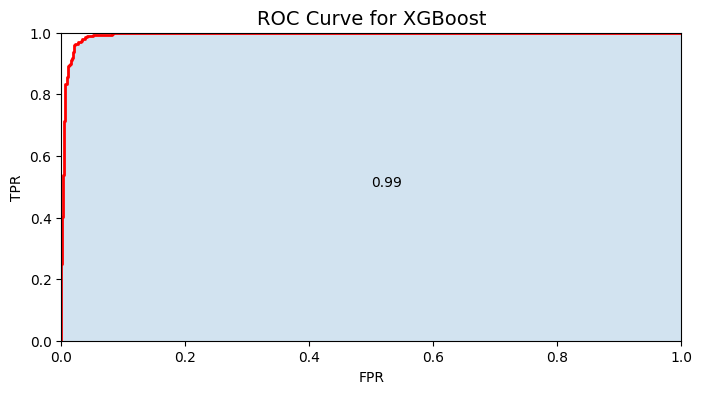

In [178]:
#Plot ROC Curve
plt.figure(figsize=(8,4))
plt.plot(fpr,tpr, lw=2, color='red')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve for XGBoost", size=14)
plt.text(s=f'{round(auc(fpr,tpr),2)}', x=.5, y=.5)
plt.fill_between(fpr,tpr, alpha=0.2)

# LEARNING CURVE TO DETERMINE GENERALISATION AND DETECT OVERFITTING

This is a check for overfitting and underfitting. The learning curve shows how the performance of the tuned model changes as the size of the training dataset increases.
It helps to assess if the model is overfitting or underfitting and whether more data will likely improve its performance.

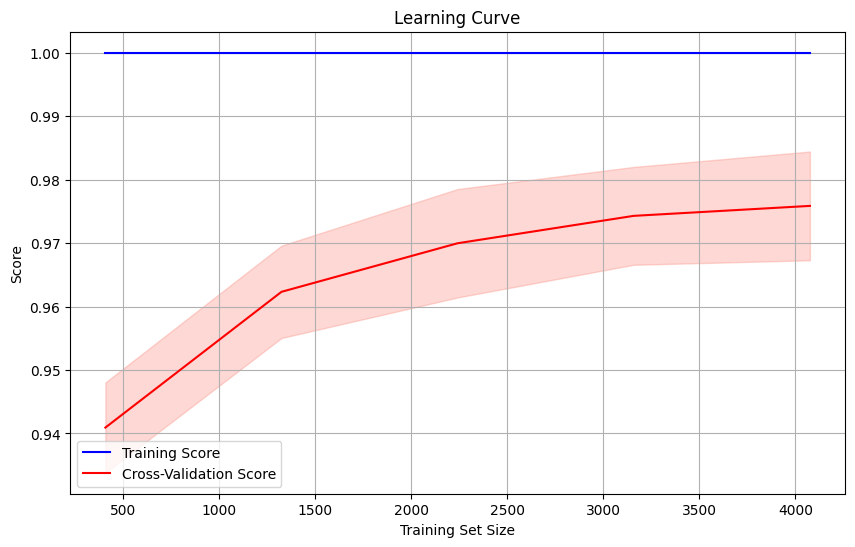

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(rf_model, X, y, cv=None):
    train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1)

    # Calculate mean and standard deviation for training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')

    # Fill uncertainty area
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightblue', alpha=0.3)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='salmon', alpha=0.3)

    # Add labels and title
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


plot_learning_curve(rf_model, X_train_scaled, y_train, cv=5)


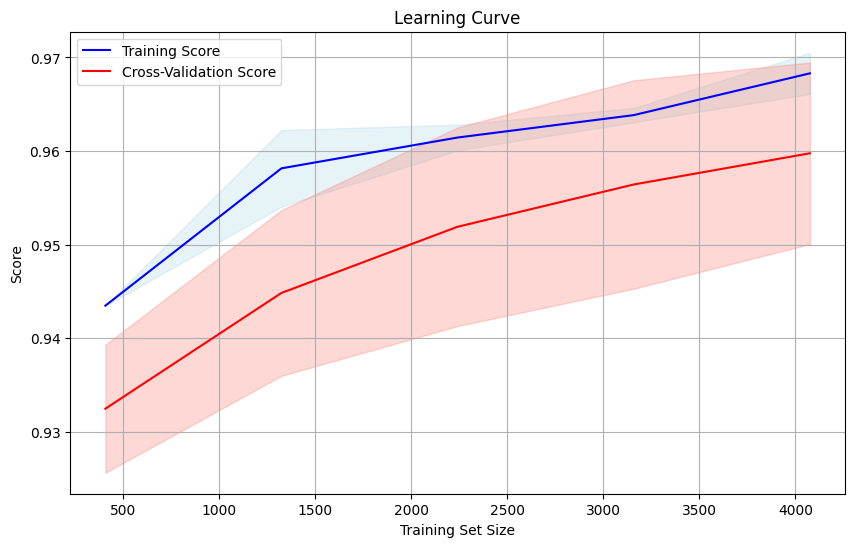

In [132]:
plot_learning_curve(hknn, X_train_scaled, y_train, cv=5)

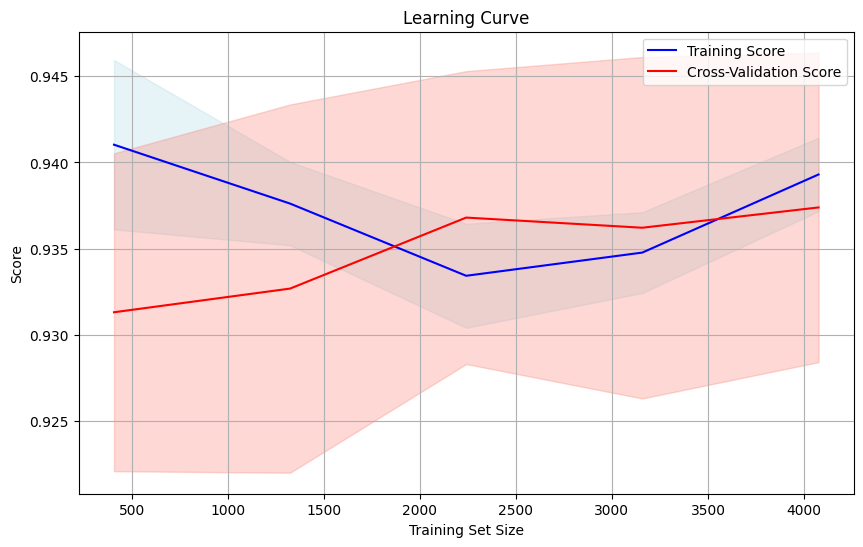

In [133]:
plot_learning_curve(hsvc, X_train_scaled, y_train, cv=5)

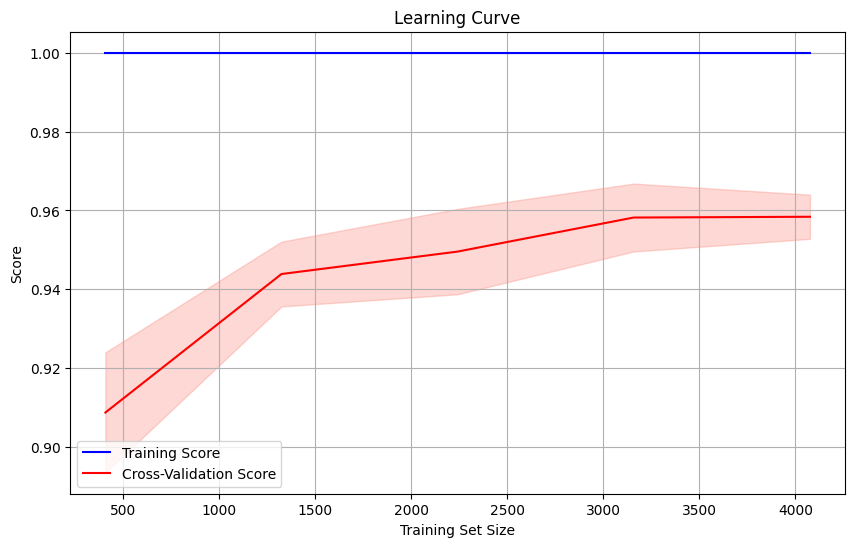

In [134]:
plot_learning_curve(hdecmodel, X_train_scaled, y_train, cv=5)

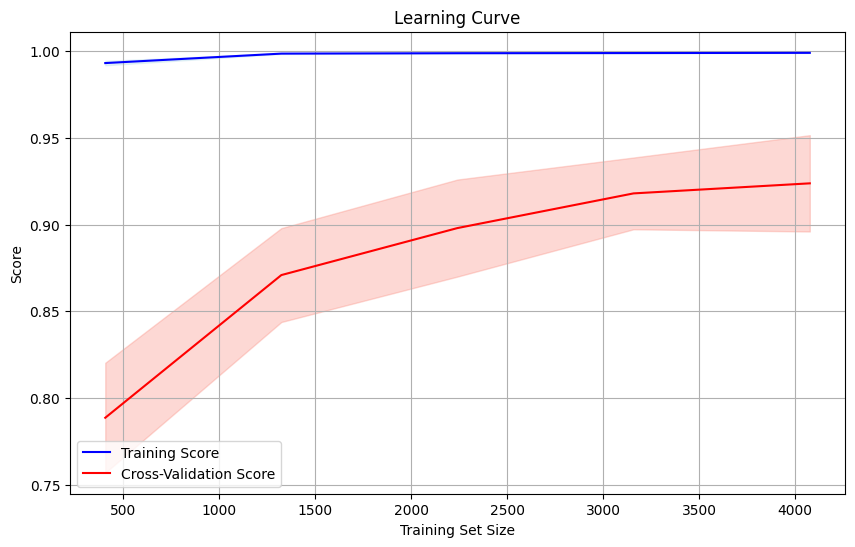

In [135]:
plot_learning_curve(xgb_model, X_train_scaled, y_train, cv=5)

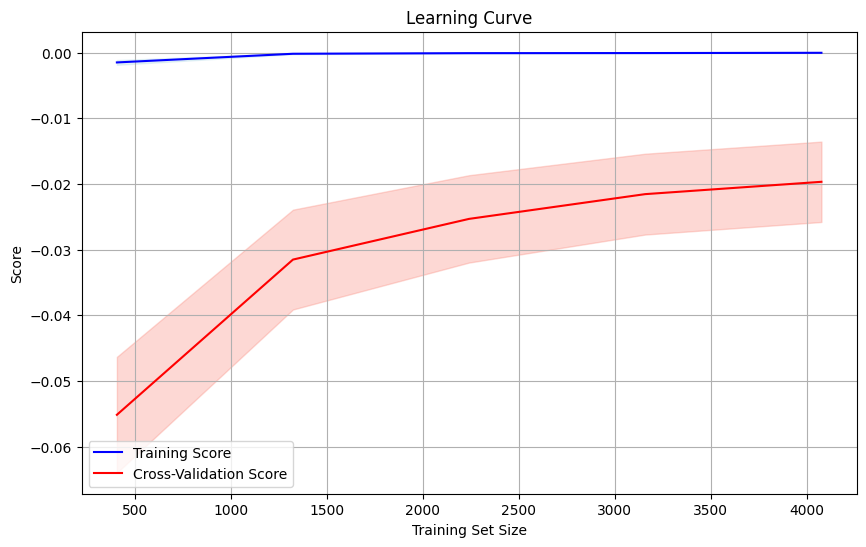

In [136]:
plot_learning_curve(clf, X_train_scaled, y_train, cv=5)

From above visualisations, we can conclude that the models did not overfit for the following reasons;
1. There is no large gap between the training score and the cross validation scores
2. The size of the uncertainty bands. i.e shaded area around the cross validation score is not too wide. However, SVM's uncertainty band is wide. That could be a sign of overfitting.

# PASSING UNSEEN DATA THROUGH THE XGBOOST REGRESSOR MODEL TO PREDICT THE NBA ALL-STAR GAME ROSTER FOR 2022/2023 SEASON

In [137]:
import pickle

In [138]:
# # save the model to disk
filename = 'newmodel.sav'
pickle.dump(clf, open(filename, 'wb'))

C:\Users\Dell_Laptop\AppData\Local\Temp\ipykernel_23088\3307460996.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='newmodel.sav'>
  pickle.dump(clf, open(filename, 'wb'))


In [139]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

C:\Users\Dell_Laptop\AppData\Local\Temp\ipykernel_23088\1538082208.py:4: ResourceWarning: unclosed file <_io.BufferedReader name='newmodel.sav'>
  loaded_model = pickle.load(open(filename, 'rb'))


In [140]:
loaded_model #viewing the loaded model

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='binary:logistic', predictor=None, ...),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

The Function below creates a set of instructions for the XGBoost model to take in new data. The important variables are defined, and scaled. The target variable is defined and then the condition to be met by the target variable is also defined.

In [142]:
def make_prediction(input_, df=False):
    if df:
        X = input_[['FG','FGA','2P','2PA','FT', 'FTA', 'MP', 'TOV', 'PTS']] # If 'df' is True, assume 'input_' is a DataFrame

        scaled_X=scaler.transform(X)
        pred_df = pd.DataFrame(loaded_model.predict(scaled_X), columns=['ASG Probability']) # Make predictions using the loaded model
        return input_.merge(pred_df, left_index=True, right_index=True) # Merge the predictions with the input DataFrame based on indices
    else:        
        scaled_X = scaler.transform(np.array(list(input_.values())).reshape(1,-1)) # If 'df' is False, assume 'input_' is a dictionary or array-like input

        return loaded_model.predict(scaled_X)

In [144]:
new_df = pd.read_csv('NBA202223.txt') #read in the unseen data

In [145]:
new_df = make_prediction(new_df, df=True) #making predictions

In [146]:
new_df #viewing the DataFrame

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,ASG Probability
0,1,Precious Achiuwa,C,23,TOR,34,10,23.3,4.0,8.2,...,4.4,6.5,1.1,0.7,0.7,1.1,2.2,10.4,achiupr01,0.000043
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,adamsst01,0.212311
2,3,Bam Adebayo,C,25,MIA,53,53,35.3,8.5,15.6,...,7.2,9.9,3.2,1.2,0.8,2.5,2.8,21.5,adebaba01,0.913630
3,4,Ochai Agbaji,SG,22,UTA,36,1,14.4,1.6,3.3,...,1.1,1.7,0.5,0.1,0.1,0.3,1.4,4.2,agbajoc01,0.000106
4,5,Santi Aldama,PF,22,MEM,53,18,22.1,3.4,7.0,...,3.7,4.7,1.2,0.7,0.7,0.8,1.9,9.5,aldamsa01,0.000029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,501,Delon Wright,PG,30,WAS,27,2,22.0,2.2,5.1,...,2.2,3.1,3.6,1.9,0.3,0.9,1.4,6.1,wrighde01,0.000058
501,502,McKinley Wright IV,PG,24,DAL,19,1,10.2,1.0,2.4,...,1.1,1.4,1.7,0.4,0.2,0.6,0.9,2.4,wrighmc01,0.000106
502,503,Thaddeus Young,PF,34,TOR,46,9,16.2,2.2,4.0,...,1.9,3.4,1.5,1.1,0.1,0.8,1.8,4.9,youngth01,0.000105
503,504,Trae Young,PG,24,ATL,51,51,35.5,8.5,19.8,...,2.2,3.0,10.2,1.0,0.2,4.2,1.5,26.9,youngtr01,0.999544


In [147]:
df_sorted = new_df.sort_values('ASG Probability', ascending=False)

In [187]:
XG_results = df_sorted[df_sorted['ASG Probability']>0.50][['Player','Tm', 'Age','G', 'GS', 'MP','FG','FGA','2P','2PA','FT', 'FTA', 'MP', 'TOV', 'PTS','ASG Probability']]
#fetching the predicted outcome of >50% chance of making the All-Star Games roster. We will consider players with high probabilities.

In [188]:
XG_results.head(30) #displaying the top 30 results from the predicted outcomes

,Player,Tm,Age,G,GS,MP,FG,FGA,2P,2PA,FT,FTA,MP,TOV,PTS,ASG Probability
135,Joel Embiid,PHI,28,44,44,34.8,11.1,20.5,9.9,17.4,9.9,11.6,34.8,3.6,33.2,0.999956
153,Paul George,LAC,32,42,42,34.2,8.1,17.7,5.1,10.0,4.0,4.7,34.2,3.3,23.3,0.999936
103,Anthony Davis,LAL,29,34,32,33.5,9.7,17.5,9.4,16.0,6.1,7.4,33.5,2.2,25.9,0.999879
291,Lauri Markkanen,UTA,25,54,54,34.3,8.4,16.4,5.4,9.0,5.0,5.7,34.3,1.8,24.9,0.999823
325,Ja Morant,MEM,23,47,47,32.7,9.7,20.7,8.0,15.5,6.3,8.5,32.7,3.5,27.5,0.999823
276,Damian Lillard,POR,32,45,45,36.1,9.4,20.0,5.2,9.0,8.4,9.2,36.1,3.1,31.2,0.999808
10,Giannis Antetokounmpo,MIL,28,45,45,33.3,11.5,21.3,10.7,18.2,8.5,13.1,33.3,4.0,32.4,0.999745
156,Shai Gilgeous-Alexander,OKC,24,52,52,35.5,10.3,20.2,9.3,17.6,9.5,10.4,35.5,2.9,30.9,0.999696
406,Domantas Sabonis,SAC,26,54,54,34.6,7.1,11.6,6.6,10.4,4.1,5.5,34.6,2.9,18.7,0.999679
268,Zach LaVine,CHI,27,53,53,36.0,8.3,17.8,5.6,10.4,4.5,5.4,36.0,2.7,23.9,0.999623


# TESTING THE RANDOM FOREST CLASSIFIER MODEL WITH UNSEEN DATA TO PREDICT THE NBA ALL-STAR GAME ROSTER FOR 2022/2023 SEASON

In [149]:
# save the model to disk
filename = 'ranformodel.sav'
pickle.dump(ranforest, open(filename, 'wb'))

C:\Users\Dell_Laptop\AppData\Local\Temp\ipykernel_23088\3004429419.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='ranformodel.sav'>
  pickle.dump(ranforest, open(filename, 'wb'))


In [150]:
# some time later...
 
# load the model from disk
ranforest_model = pickle.load(open(filename, 'rb'))

C:\Users\Dell_Laptop\AppData\Local\Temp\ipykernel_23088\781407751.py:4: ResourceWarning: unclosed file <_io.BufferedReader name='ranformodel.sav'>
  ranforest_model = pickle.load(open(filename, 'rb'))


The Function below creates a set of instructions for the random forest model to take in new data. The important variables are defined,
and scaled. The target variable is defined and then the condition to be met by the target variable is also defined.

In [151]:
def asg_prediction(newdata, df=False):
    if df:
        X = newdata[['FG','FGA','2P','2PA','FT', 'FTA', 'MP', 'TOV', 'PTS']]#defining the variables
        my_scaled_X = scaler.transform(X)
        pred_asg = pd.DataFrame(ranforest_model.predict(my_scaled_X), columns=['All_Star']) #predicting the target variable
        return newdata.merge(pred_asg, left_index=True, right_index=True)
    else:        
        my_scaled_X = scaler.transform(np.array(list(newdata.values())).reshape(1,-1))#reshaping the numpy arrays
        return 'All Star player' if ranforest_model.predict(my_scaled_X)[0] else 'Not All Star player'

In [152]:
new_df2 = pd.read_csv('NBA202223.txt') #Reading in the Unseen dataset

In [153]:
pred_asg = asg_prediction(new_df2, df=True)
pred_asg.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,All_Star
0,1,Precious Achiuwa,C,23,TOR,34,10,23.3,4.0,8.2,...,4.4,6.5,1.1,0.7,0.7,1.1,2.2,10.4,achiupr01,0
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,adamsst01,0
2,3,Bam Adebayo,C,25,MIA,53,53,35.3,8.5,15.6,...,7.2,9.9,3.2,1.2,0.8,2.5,2.8,21.5,adebaba01,1
3,4,Ochai Agbaji,SG,22,UTA,36,1,14.4,1.6,3.3,...,1.1,1.7,0.5,0.1,0.1,0.3,1.4,4.2,agbajoc01,0
4,5,Santi Aldama,PF,22,MEM,53,18,22.1,3.4,7.0,...,3.7,4.7,1.2,0.7,0.7,0.8,1.9,9.5,aldamsa01,0


In [164]:
asg_results = pred_asg[pred_asg['All_Star'] == 1][['Player','Age', 'Tm','FG','FGA','2P','2PA','FT', 'FTA','G','GS', 'MP', 'TOV', 'PTS', 'All_Star']]
#fetching all star players predicted by the random forest model.

In [165]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

#This is the pandas option to display all rows without ellipses.

In [189]:
asg_results.head(30) #displaying the top 30 results from the predicted outcomes

,Player,Age,Tm,FG,FGA,2P,2PA,FT,FTA,G,GS,MP,TOV,PTS,All_Star
2,Bam Adebayo,25,MIA,8.5,15.6,8.5,15.4,4.5,5.6,53,53,35.3,2.5,21.5,1
10,Giannis Antetokounmpo,28,MIL,11.5,21.3,10.7,18.2,8.5,13.1,45,45,33.3,4.0,32.4,1
20,LaMelo Ball,21,CHO,8.2,20.1,4.4,9.6,2.9,3.4,32,32,35.3,3.4,23.2,1
22,Paolo Banchero,20,ORL,6.5,15.6,5.3,11.4,5.7,7.6,51,51,33.8,2.7,20.0,1
23,Desmond Bane,24,MEM,7.5,16.0,4.4,8.9,3.4,3.8,34,34,31.2,2.2,21.4,1
28,RJ Barrett,22,NYK,7.0,16.3,5.2,10.8,4.0,5.3,52,52,34.5,2.3,19.8,1
34,Bradley Beal,29,WAS,8.7,16.6,7.0,12.1,3.8,4.4,34,34,32.8,2.7,22.8,1
45,Bojan Bogdanović,33,DET,7.3,14.9,4.8,8.9,4.7,5.3,55,55,32.1,2.2,21.7,1
48,Devin Booker,26,PHO,9.5,20.2,7.2,13.8,5.2,6.2,31,31,34.0,2.5,26.6,1
62,Jaylen Brown,26,BOS,9.9,20.2,7.3,12.6,4.3,5.5,48,48,35.6,3.0,26.5,1


# ORDER OF IMPORTANCE OF FEATURES USED BY THE XGBOOST MODEL

In [184]:
# Calculate feature importances from the XGBoost model
feature_importance=pd.DataFrame(data=xgb_model.feature_importances_, index = X_train.columns,
columns = ['Feature_importance']).sort_values('Feature_importance')
print(feature_importance) # Print the feature importance scores

     Feature_importance
2PA            0.022896
FGA            0.030881
2P             0.035809
FG             0.043693
TOV            0.051504
FTA            0.069866
FT             0.079322
PTS            0.082353
MP             0.583676


Text(0.5, 0, 'Importance Score')

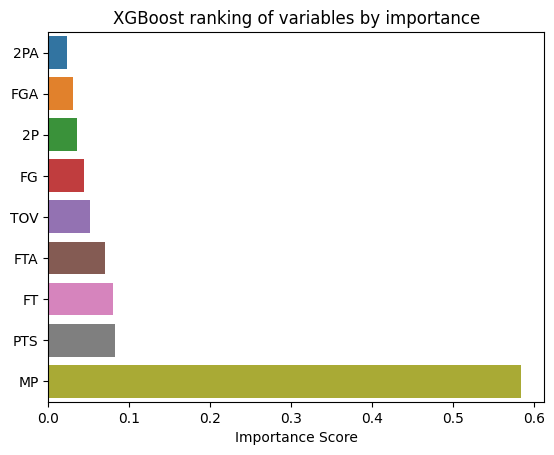

In [190]:
#plot importance
sns.barplot(x='Feature_importance', y=feature_importance.index, data=feature_importance, order=feature_importance.index[:10])
plt.title('XGBoost ranking of variables by importance')
plt.xlabel('Importance Score')

# ORDER OF IMPORTANCE OF FEATURES USED BY THE RANDOM FOREST MODEL

In [186]:
# Calculate feature importances from the Random Forest model
feature_importance2=pd.DataFrame(data=ranformodel.feature_importances_, index = X_train.columns,
columns = ['Feature_importance']).sort_values('Feature_importance')
print(feature_importance2)

     Feature_importance
2PA            0.020715
2P             0.026041
FGA            0.032149
TOV            0.055587
FTA            0.115485
FG             0.129757
PTS            0.163763
FT             0.165609
MP             0.290895


Text(0.5, 0, 'Importance Score')

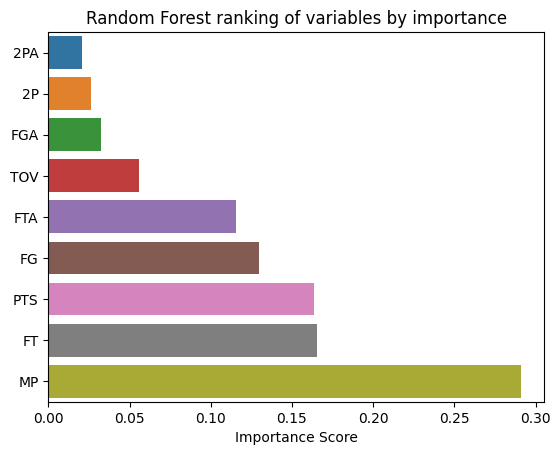

In [191]:
#plot importance
sns.barplot(x='Feature_importance', y=feature_importance2.index, data=feature_importance2, order=feature_importance2.index[:10])
plt.title('Random Forest ranking of variables by importance')
plt.xlabel('Importance Score')